# PROJECT  NAME- INSURANCE DOMAIN:

### PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS

## BUSINESS PROBLEM STATEMENT::

Develop a predictive model that assesses the claim probability for car insurance policies.
The objective would be to understand the factors that influence claim frequency and 
severity in the period of six months and enable insurance companies to better assess risk
and determine appropriate premiums for policyholders.

### First we will import all necessary libraries

In [149]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
#import machine learning sklearn related models metrices preprocessing stuff here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [150]:
#lets load the data and check a single record for sample
data= pd.read_csv('Data.csv')
data.head(1).T

,0
policy_id,ID00001
policy_tenure,0.515874
age_of_car,0.05
age_of_policyholder,0.644231
area_cluster,C1
population_density,4990
make,1
segment,A
model,M1
fuel_type,CNG


In [151]:
# checking bottom 5 rows:
data.tail(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [152]:
# lets check the data types and columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [153]:
#Checking descriptive stats for numeric features
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


## Observation:
    make is 3 most of the cars
    50% of cars have 2 airbags
    75% car have 5 gear box
    ncap rating of 50% is 2 and 25% have 0 rating 75% have 3 rating so there are only 25% with 4 ,5 rating
    
    To be Done:
        
    make is categorical we have to convert it to object instead of int
    same for ncap_rating also as it is categorical
    is_claim is target and its categorical too currently its int we have to change it to object


    ['make','ncap_rating','is_claim']

In [154]:
#checking descriptive stats for string features
data.describe(include='object')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,...,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,...,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


## Observations:
    
    Most of vechile are of petrol types.
    Most available model is M1
    Most available cars are of B2 segment
    Most cars have manual transmisson.
    Rear Window wiper defogger/Wiper/Washer features are missing from most vechiles
    Esc is not there in most of the cars which is important safety feature
    is_ecw feature is there in most of the cars
    most cars have Drum brake which is less effiecient as compared to disc brakes in case of emergency

## Checking missing values in dataset

In [155]:
data.isna().sum().sum()
#observation: No missing values in dataset

0

## Checking duplicate values

In [156]:
data.duplicated().sum()
#observation: No duplicated rows in dataset

0

In [157]:
#dropping policy_id as it is id and not relevant as features to predict the claim status
data.drop(columns='policy_id',inplace=True)

## Casting features with appropriate datatype

In [158]:
# ['make','ncap_rating','is_claim'] to objects
# Cast columns to category type
data['make'] = data['make'].astype('object')
data['ncap_rating'] = data['ncap_rating'].astype('object')
data['is_claim'] = data['is_claim'].astype('object')

In [159]:
#making separate features numerical, flag values features and catergorical features here
flag_columns=[]
for col in data.columns:
    if col[:2] == "is":
        flag_columns.append(col)
flag_columns

numerical_columns = data.select_dtypes(include='number').columns
numerical_columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight'],
      dtype='object')

In [160]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

## Doing some statistical test to check the significance of Numerical and categorical Features with target is_claim

In [162]:
# Correlation analysis for numerical features

correlations = {}
for col in numerical_columns:
    corr, _ = pearsonr(data[col], data['is_claim'])
    correlations[col] = corr
    
for k,v in correlations.items():
    if abs(v) >= 0.01:
        print(f'numerical features with greater than 0.01::{k}')

numerical features with greater than 0.01::policy_tenure
numerical features with greater than 0.01::age_of_car
numerical features with greater than 0.01::age_of_policyholder
numerical features with greater than 0.01::population_density
numerical features with greater than 0.01::cylinder


In [163]:
correlations
#Observation::
# here very less correlation between policy_tenure,age_of_car,age_of_policyholder and population_density
# to claim status rest other numerical features are not correlated to target variable as much

{'policy_tenure': 0.07874744763544526,
 'age_of_car': -0.028172125929024995,
 'age_of_policyholder': 0.022435328309114773,
 'population_density': -0.017808337045855917,
 'airbags': 0.0027887938669209572,
 'displacement': 0.0076778476922651625,
 'cylinder': 0.01343359293308959,
 'gear_box': -0.0006354292186875371,
 'turning_radius': 0.002724222929160633,
 'length': 0.0064945379733182046,
 'width': 0.009947051749074443,
 'height': -0.00202353416677682,
 'gross_weight': 0.0038944029207040303}

In [164]:
# Chi-Square Test for categorical features significance
from scipy.stats import chi2_contingency
chi2_result = {}
significant_catfeatures =[]
nonsignificant_catfeatures =[]
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['is_claim'])
    chi2,p,_,_ = chi2_contingency(contingency_table)
    chi2_result[col]= (chi2, p)    

print("\nChi-Square Test:")
for key, value in chi2_result.items():
    print(f"{key}: chi2={value[0]:.4f}, p-value={value[1]:.4f}")
    if value[1] <= 0.05:
        significant_catfeatures.append(key)
    else:
        nonsignificant_catfeatures.append(key)
        
print(f'significant features as per chi test {significant_catfeatures}')
print('*'*40)
print(f'non significant features as per chi test {nonsignificant_catfeatures}')


Chi-Square Test:
area_cluster: chi2=96.0826, p-value=0.0000
make: chi2=4.4240, p-value=0.3517
segment: chi2=12.6039, p-value=0.0274
model: chi2=19.9750, p-value=0.0295
fuel_type: chi2=5.7596, p-value=0.0561
max_torque: chi2=19.3883, p-value=0.0129
max_power: chi2=19.3883, p-value=0.0129
engine_type: chi2=19.9750, p-value=0.0295
is_esc: chi2=0.4995, p-value=0.4797
is_adjustable_steering: chi2=11.2315, p-value=0.0008
is_tpms: chi2=0.0226, p-value=0.8805
is_parking_sensors: chi2=3.9806, p-value=0.0460
is_parking_camera: chi2=0.0375, p-value=0.8465
rear_brakes_type: chi2=0.0226, p-value=0.8805
transmission_type: chi2=0.0186, p-value=0.8914
steering_type: chi2=5.7361, p-value=0.0568
is_front_fog_lights: chi2=8.0951, p-value=0.0044
is_rear_window_wiper: chi2=0.3881, p-value=0.5333
is_rear_window_washer: chi2=0.3881, p-value=0.5333
is_rear_window_defogger: chi2=0.3706, p-value=0.5427
is_brake_assist: chi2=6.8632, p-value=0.0088
is_power_door_locks: chi2=2.5210, p-value=0.1123
is_central_lock

## Observation::

significant features as per chi test ['area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']
    
    
non significant features as per chi test ['make', 'fuel_type', 'is_esc', 'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']

In [165]:
#separating x and y for Annova test
x=data.drop(columns='is_claim',axis=1)
y=data['is_claim']

In [166]:
# ANOVA Test
from scipy.stats import f_oneway
anova_results = {}
signi_catfeatures_annova=[]
nonsigni_catfeatures_annova=[]

for col in categorical_columns:
    categories = data[col].unique()
    groups = [y[data[col]==category] for category in categories]
    f_val, p_val = f_oneway(*groups)
    anova_results[col] = (f_val, p_val)

print("\nANOVA Test:")
for key, value in anova_results.items():
    print(f"{key}: F = {value[0]:.4f}, p-value = {value[1]:.4f}")
    
    if value[1] <= 0.05:
        signi_catfeatures_annova.append(key)
    else:
        nonsigni_catfeatures_annova.append(key)
        
print(f'significant features as per annova test {signi_catfeatures_annova}')
print('*'*40)
print(f'non significant features as per annova test {nonsigni_catfeatures_annova}')


ANOVA Test:
area_cluster: F = 4.5812, p-value = 0.0000
make: F = 1.1060, p-value = 0.3517
segment: F = 2.5211, p-value = 0.0274
model: F = 1.9978, p-value = 0.0295
fuel_type: F = 2.8799, p-value = 0.0561
max_torque: F = 2.4240, p-value = 0.0129
max_power: F = 2.4240, p-value = 0.0129
engine_type: F = 1.9978, p-value = 0.0295
is_esc: F = 0.5255, p-value = 0.4685
is_adjustable_steering: F = 11.3494, p-value = 0.0008
is_tpms: F = 0.0290, p-value = 0.8649
is_parking_sensors: F = 4.1535, p-value = 0.0416
is_parking_camera: F = 0.0445, p-value = 0.8330
rear_brakes_type: F = 0.0290, p-value = 0.8649
transmission_type: F = 0.0238, p-value = 0.8774
steering_type: F = 2.8682, p-value = 0.0568
is_front_fog_lights: F = 8.1936, p-value = 0.0042
is_rear_window_wiper: F = 0.4117, p-value = 0.5211
is_rear_window_washer: F = 0.4117, p-value = 0.5211
is_rear_window_defogger: F = 0.3925, p-value = 0.5310
is_brake_assist: F = 6.9529, p-value = 0.0084
is_power_door_locks: F = 2.5813, p-value = 0.1081
is_c

## Univariate Visualisation for numerical and categorical columns to check distribution and value counts

In [167]:
#first checking unique value counts in each categorical feature
def unique_count_feature(df):
    # Iterate over each categorical column
    for col in categorical_columns:
        print(f"Column: {col}")
        print(f"Number of Unique Values: {df[col].nunique()}")
        print("----------------------------------")
        
unique_count_feature(data)

#most value counts are for clusters 22 and other than that rest have 2 and <10 value counts

Column: area_cluster
Number of Unique Values: 22
----------------------------------
Column: make
Number of Unique Values: 5
----------------------------------
Column: segment
Number of Unique Values: 6
----------------------------------
Column: model
Number of Unique Values: 11
----------------------------------
Column: fuel_type
Number of Unique Values: 3
----------------------------------
Column: max_torque
Number of Unique Values: 9
----------------------------------
Column: max_power
Number of Unique Values: 9
----------------------------------
Column: engine_type
Number of Unique Values: 11
----------------------------------
Column: is_esc
Number of Unique Values: 2
----------------------------------
Column: is_adjustable_steering
Number of Unique Values: 2
----------------------------------
Column: is_tpms
Number of Unique Values: 2
----------------------------------
Column: is_parking_sensors
Number of Unique Values: 2
----------------------------------
Column: is_parking_camera

<Figure size 1600x800 with 0 Axes>

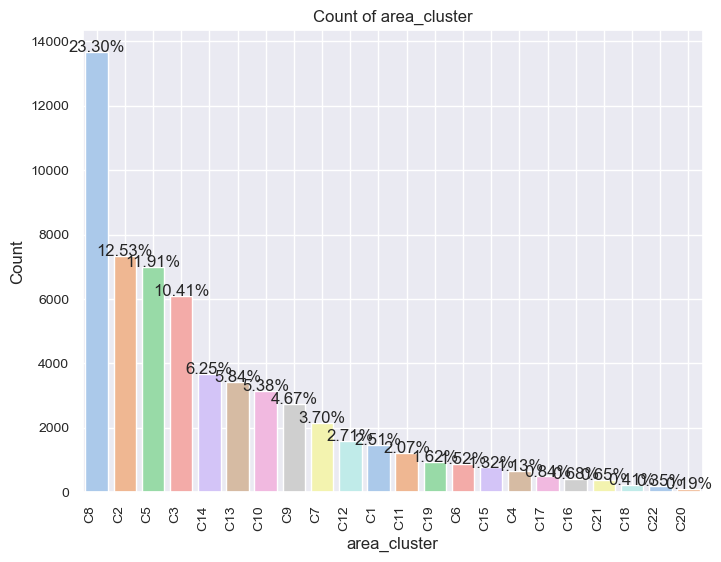

<Figure size 1600x800 with 0 Axes>

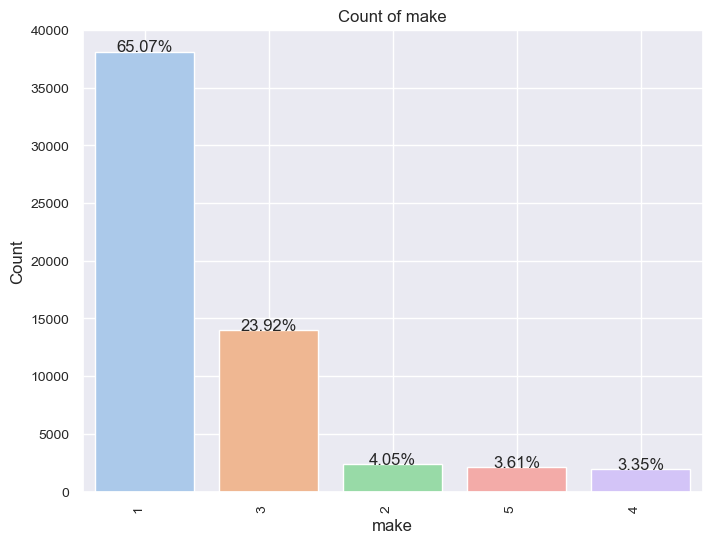

<Figure size 1600x800 with 0 Axes>

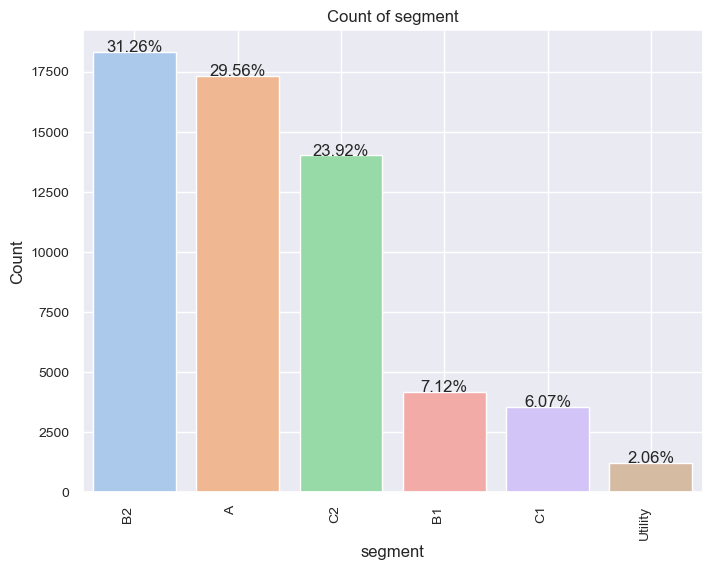

<Figure size 1600x800 with 0 Axes>

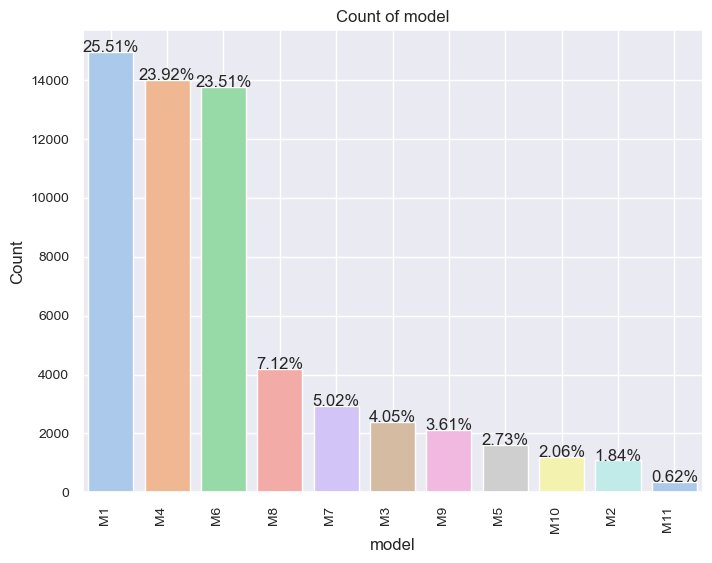

<Figure size 1600x800 with 0 Axes>

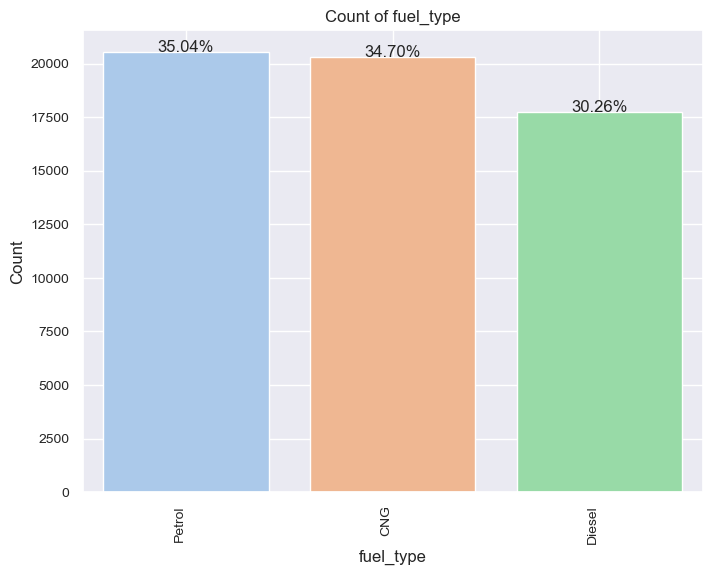

<Figure size 1600x800 with 0 Axes>

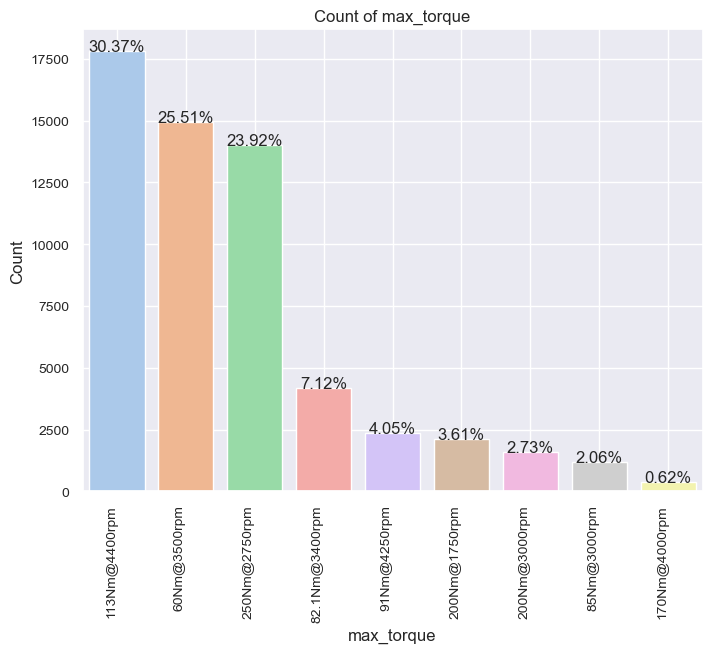

<Figure size 1600x800 with 0 Axes>

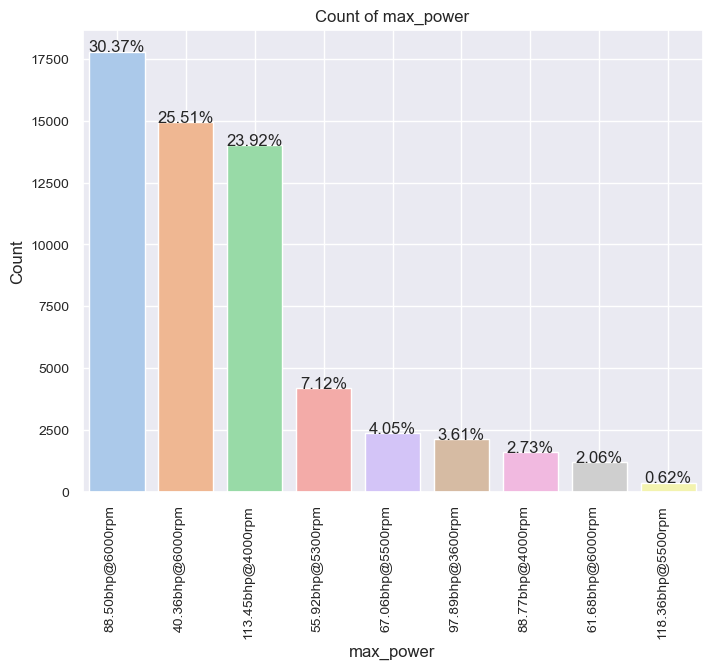

<Figure size 1600x800 with 0 Axes>

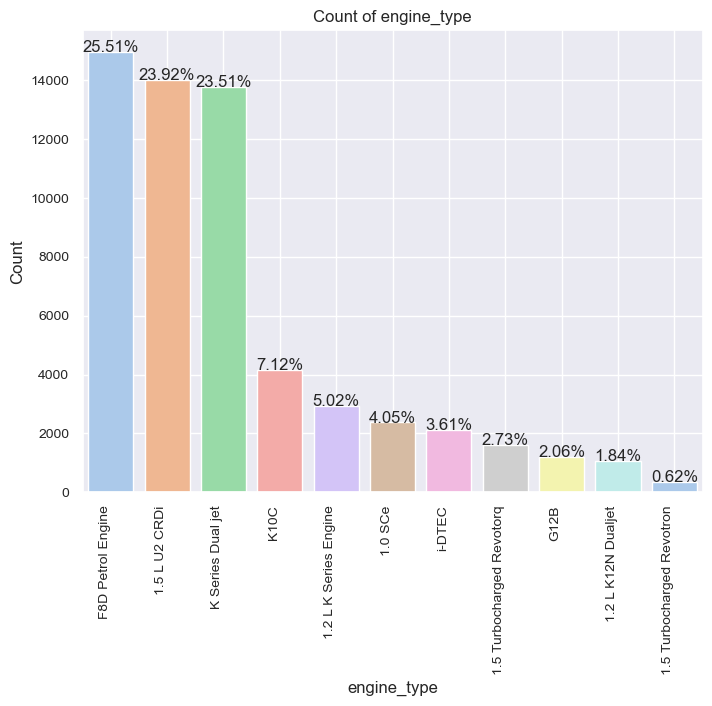

<Figure size 1600x800 with 0 Axes>

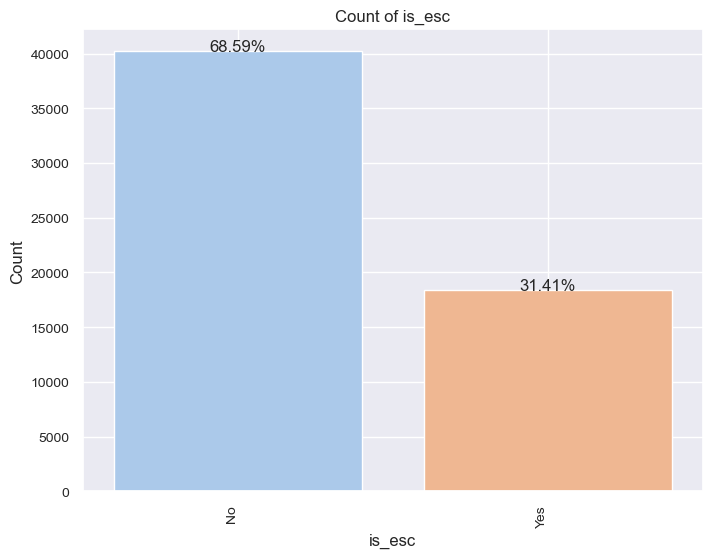

<Figure size 1600x800 with 0 Axes>

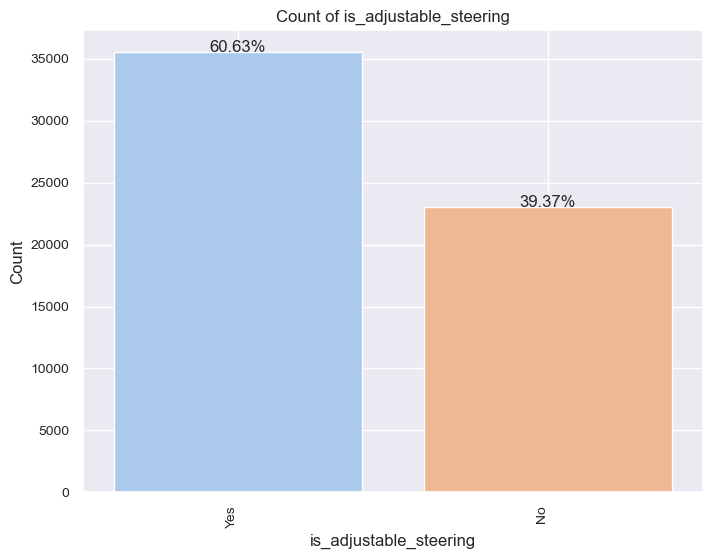

<Figure size 1600x800 with 0 Axes>

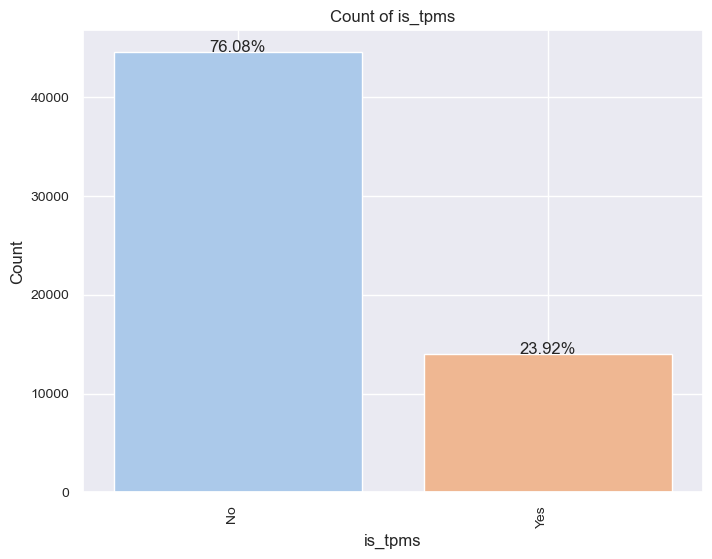

<Figure size 1600x800 with 0 Axes>

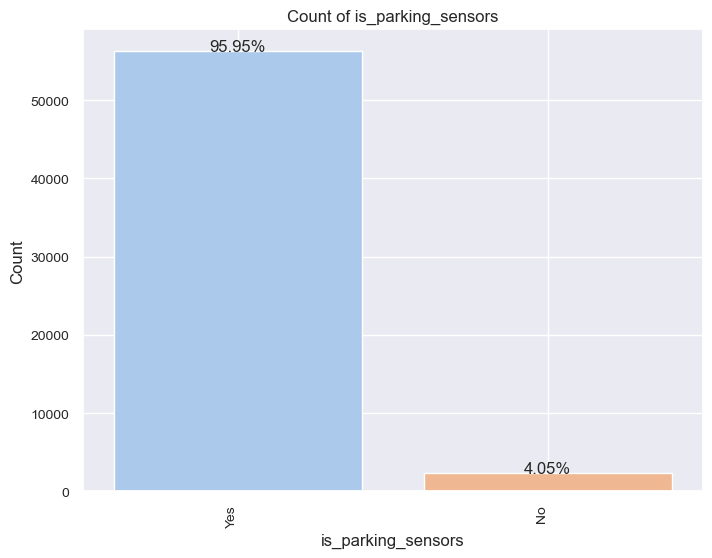

<Figure size 1600x800 with 0 Axes>

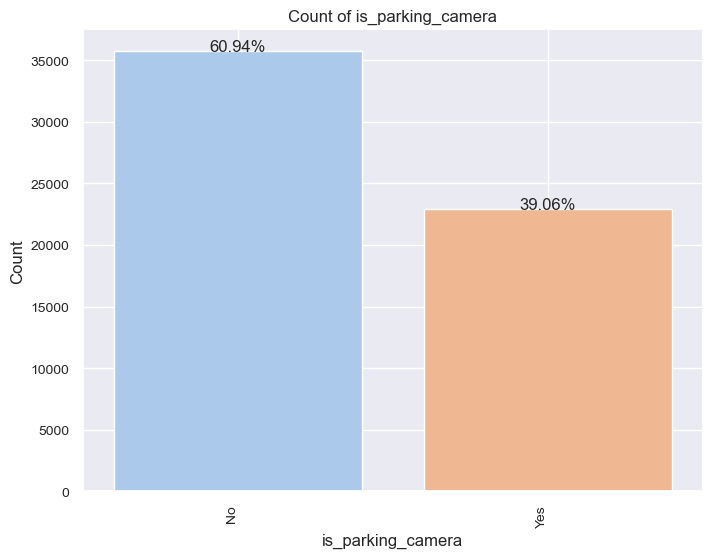

<Figure size 1600x800 with 0 Axes>

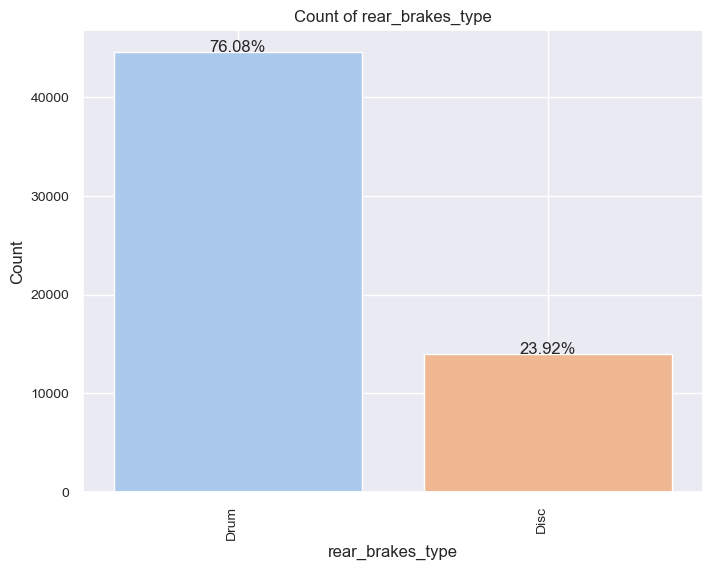

<Figure size 1600x800 with 0 Axes>

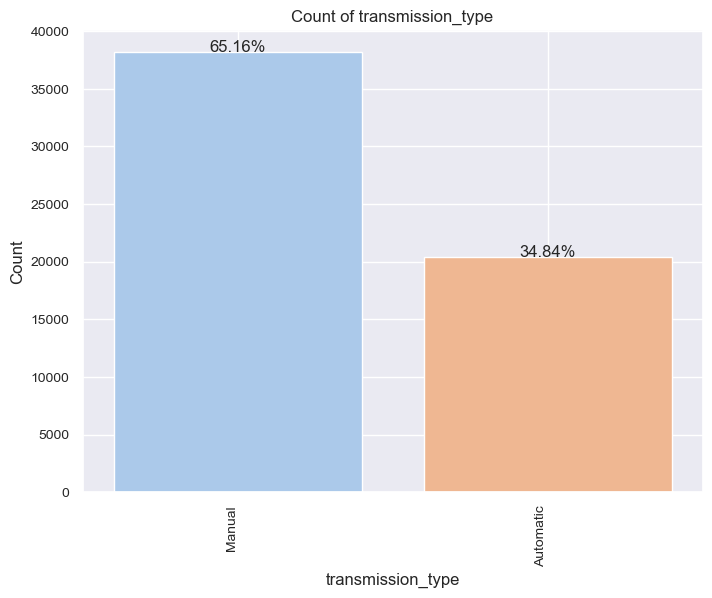

<Figure size 1600x800 with 0 Axes>

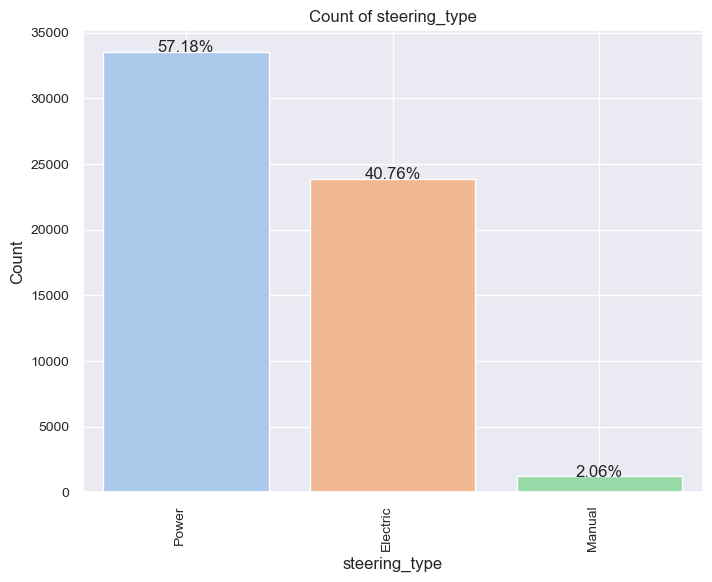

<Figure size 1600x800 with 0 Axes>

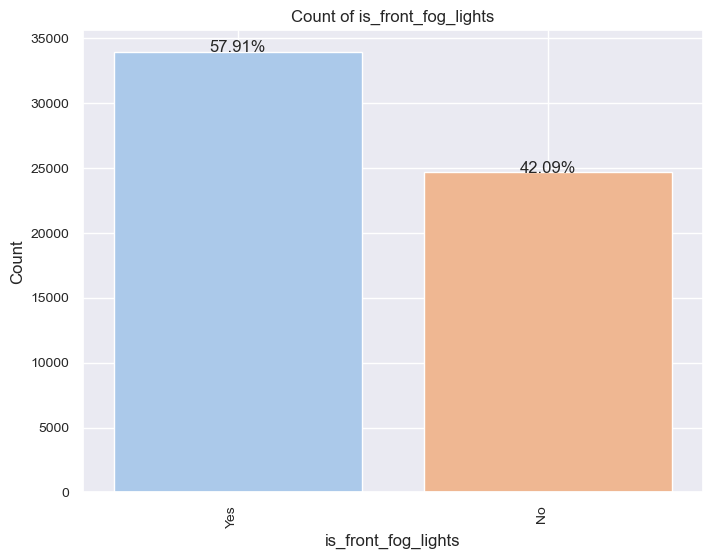

<Figure size 1600x800 with 0 Axes>

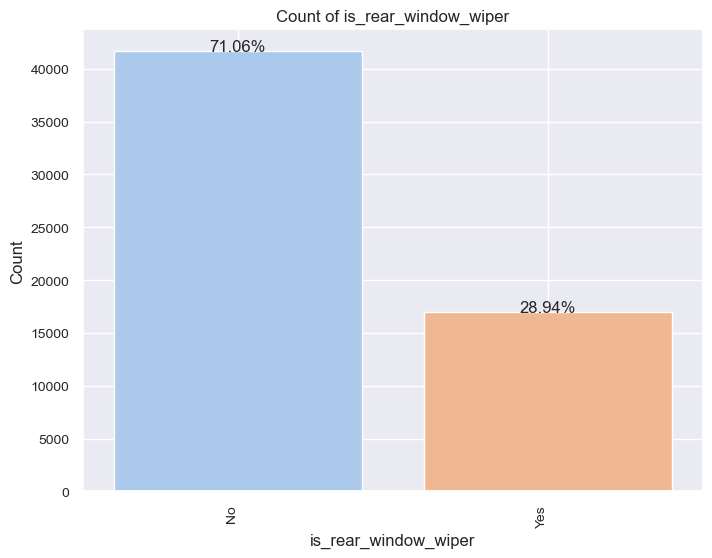

<Figure size 1600x800 with 0 Axes>

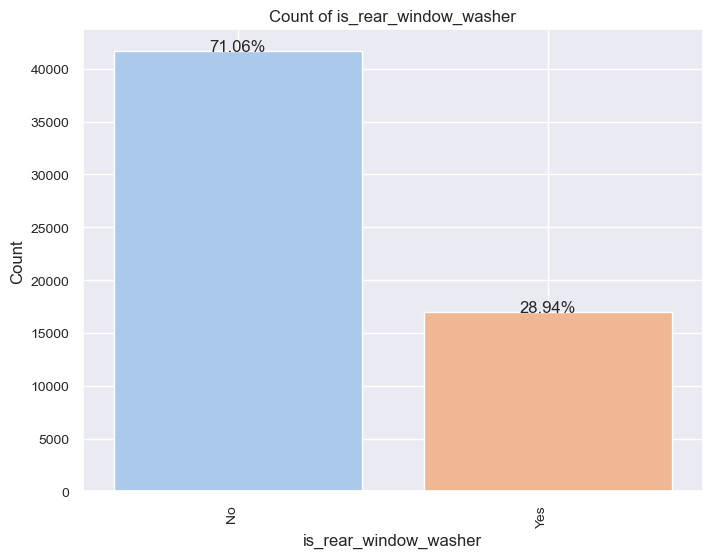

<Figure size 1600x800 with 0 Axes>

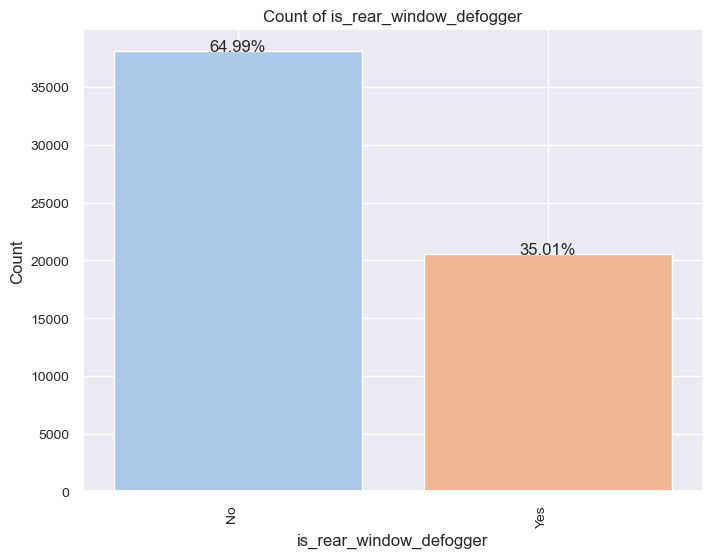

<Figure size 1600x800 with 0 Axes>

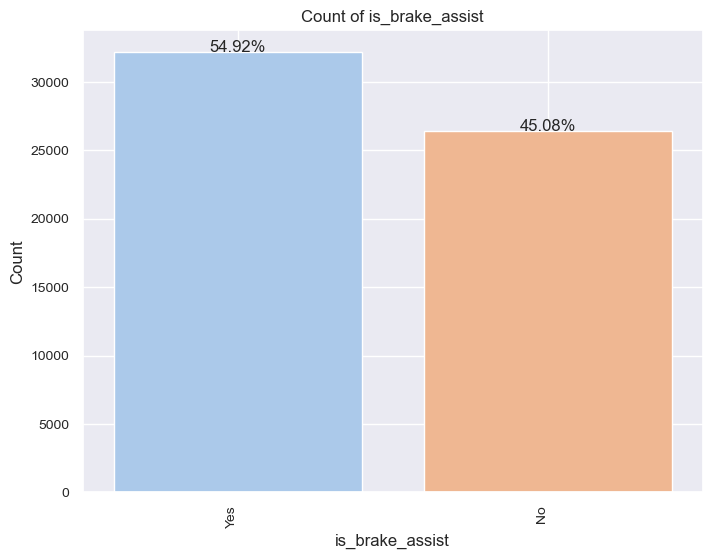

<Figure size 1600x800 with 0 Axes>

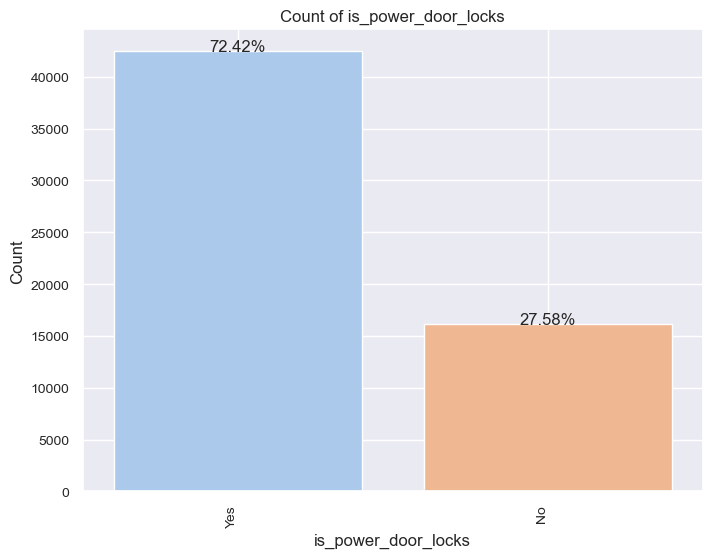

<Figure size 1600x800 with 0 Axes>

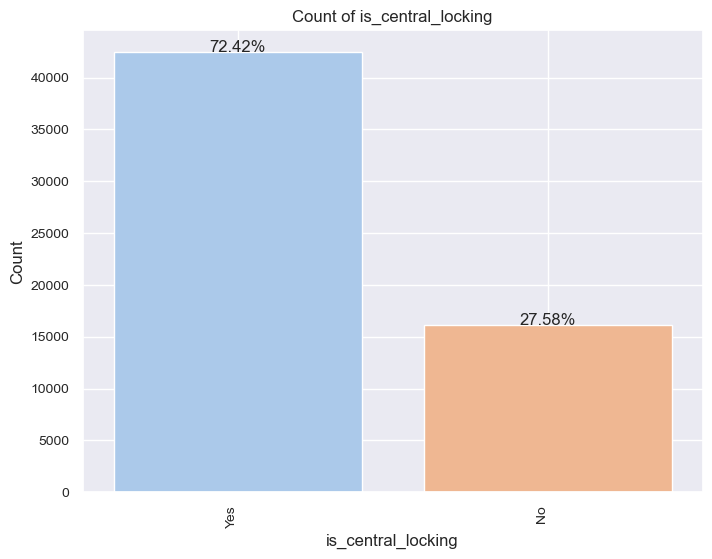

<Figure size 1600x800 with 0 Axes>

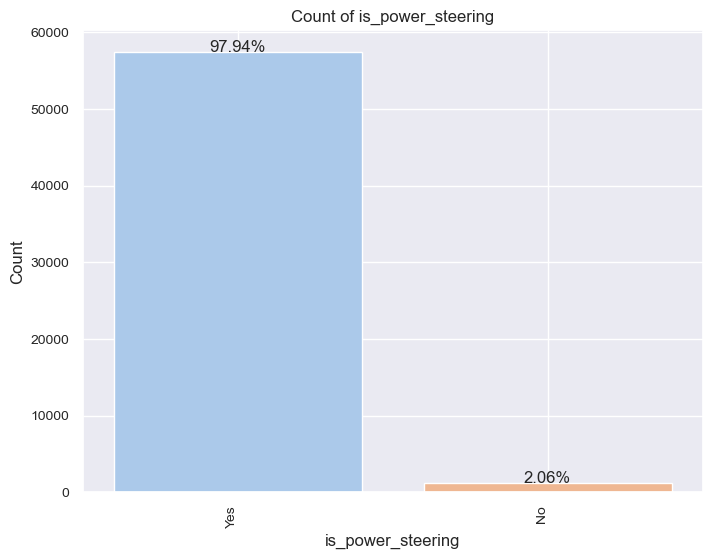

<Figure size 1600x800 with 0 Axes>

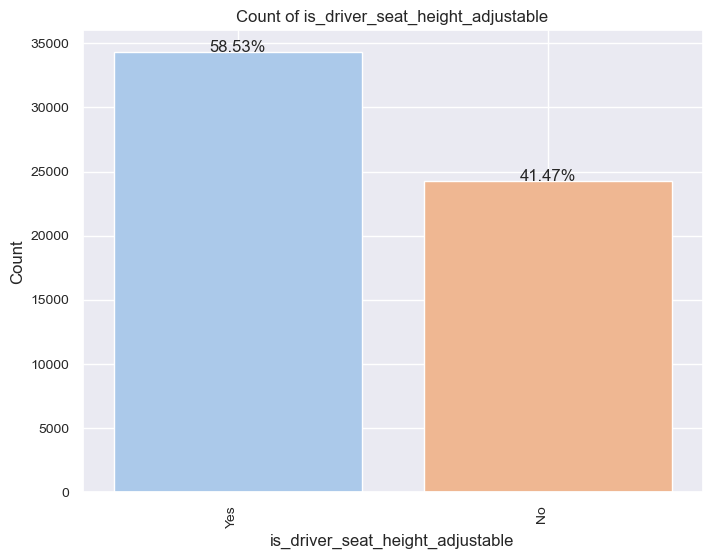

<Figure size 1600x800 with 0 Axes>

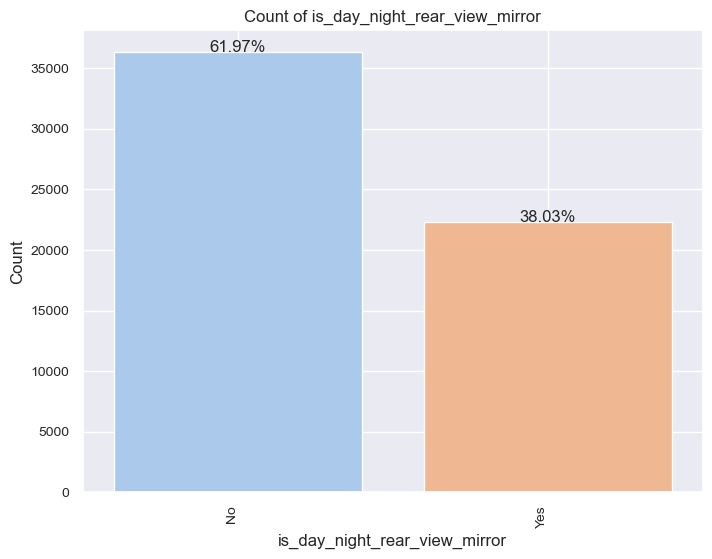

<Figure size 1600x800 with 0 Axes>

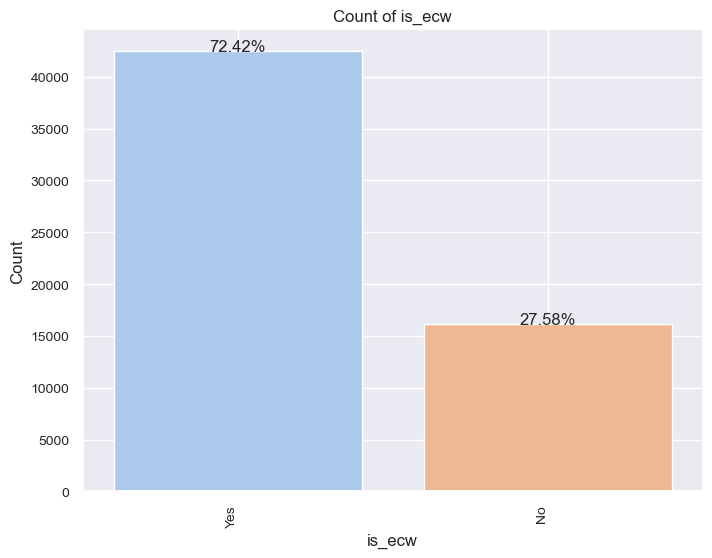

<Figure size 1600x800 with 0 Axes>

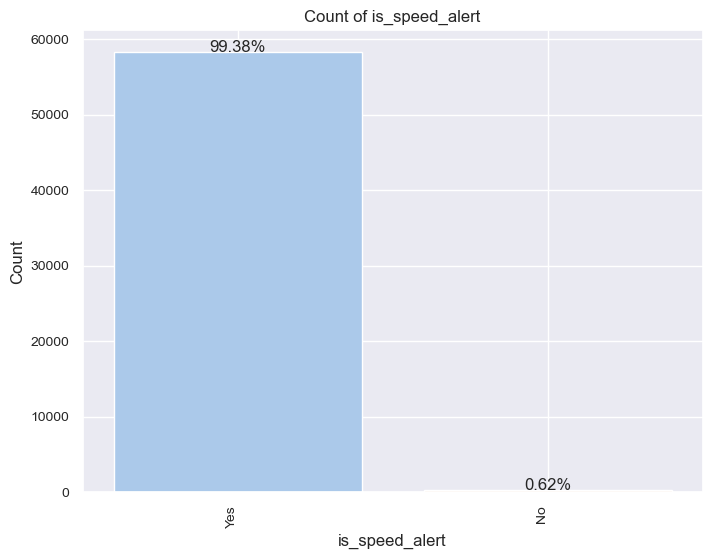

<Figure size 1600x800 with 0 Axes>

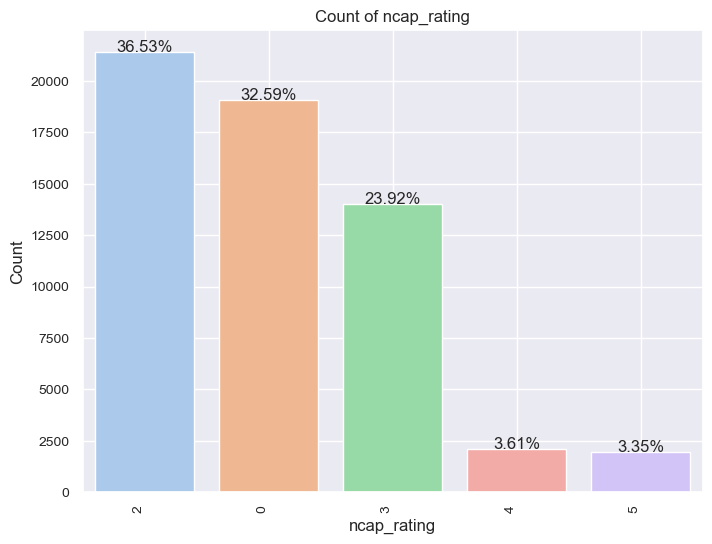

<Figure size 1600x800 with 0 Axes>

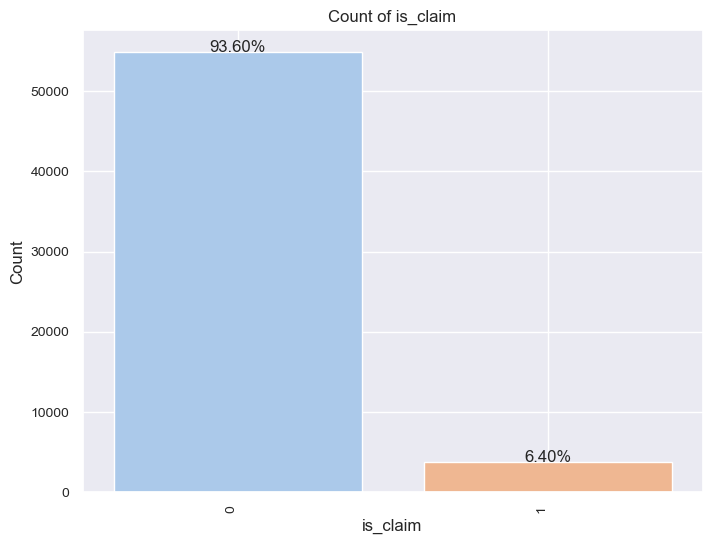

In [168]:
#plotting count plot of values count of categorical columns whose unique count are less than 80
def plot_count_plot(df):
    for col in categorical_columns:
        plt.figure(figsize=(16, 8))
        
        # Calculate the percentages
        category_counts = df[col].value_counts()
        total = category_counts.sum()
        percentages = [(count / total) * 100 for count in category_counts]

        # Get the sorted order of categories by count
        order = category_counts.index
        
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=col, data=df, palette='pastel',order=order)
        # Add percentages on top of each bar
        for i, p in enumerate(ax.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{percentages[i]:.2f}%', ha='center')

    
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels
        plt.yticks(fontsize=10)
        plt.title(f'Count of {col}')
        plt.grid(True)
        plt.show()
        
plot_count_plot(data)

In [169]:
## Observations:

# c8,c2,c5,c3 clusters are top 4 clusters in data
# Make wise vechile percentage is 1 is 65,3 is 23,2 is 4,5 is 3 and 4 is 3.3%
# Top 3 segments of vechile are b2 A and c2,utility vechiles are the least with only 2 %
# Model wise M1,4,M6 are top 3 with approx 75% share of data
# Fuel wise petrol and cng are similar(35%) and diesel vechile is 30%
# Top 3 torque are 113,60 and 250 count wise
# Top 3 BHP are 88,40 and 113 count wise
# F&D petrol,CRdi1.2 and k sereis dual jet are top 3 engines wiht 75% of vechiles, turbo charged revtron is least with less than 1%
# ony 4% vechiles dont have parking sensors
# 40% have parking camera
# 35  % disc brakes and rest 65 have drum brakes
# Break asssist is 55 yes and 45 no
# 27% vechiles dont have power door locks
# 98% have poer sterring
# 99% vechiles have speed alert
# Ncap rating 75% less than 3 and only 6 percent have 4,5 rating
# claim yes cases are only 6.4% which is clearely a imbalance dataset




In [170]:
# checking  distribution of all numerical features here

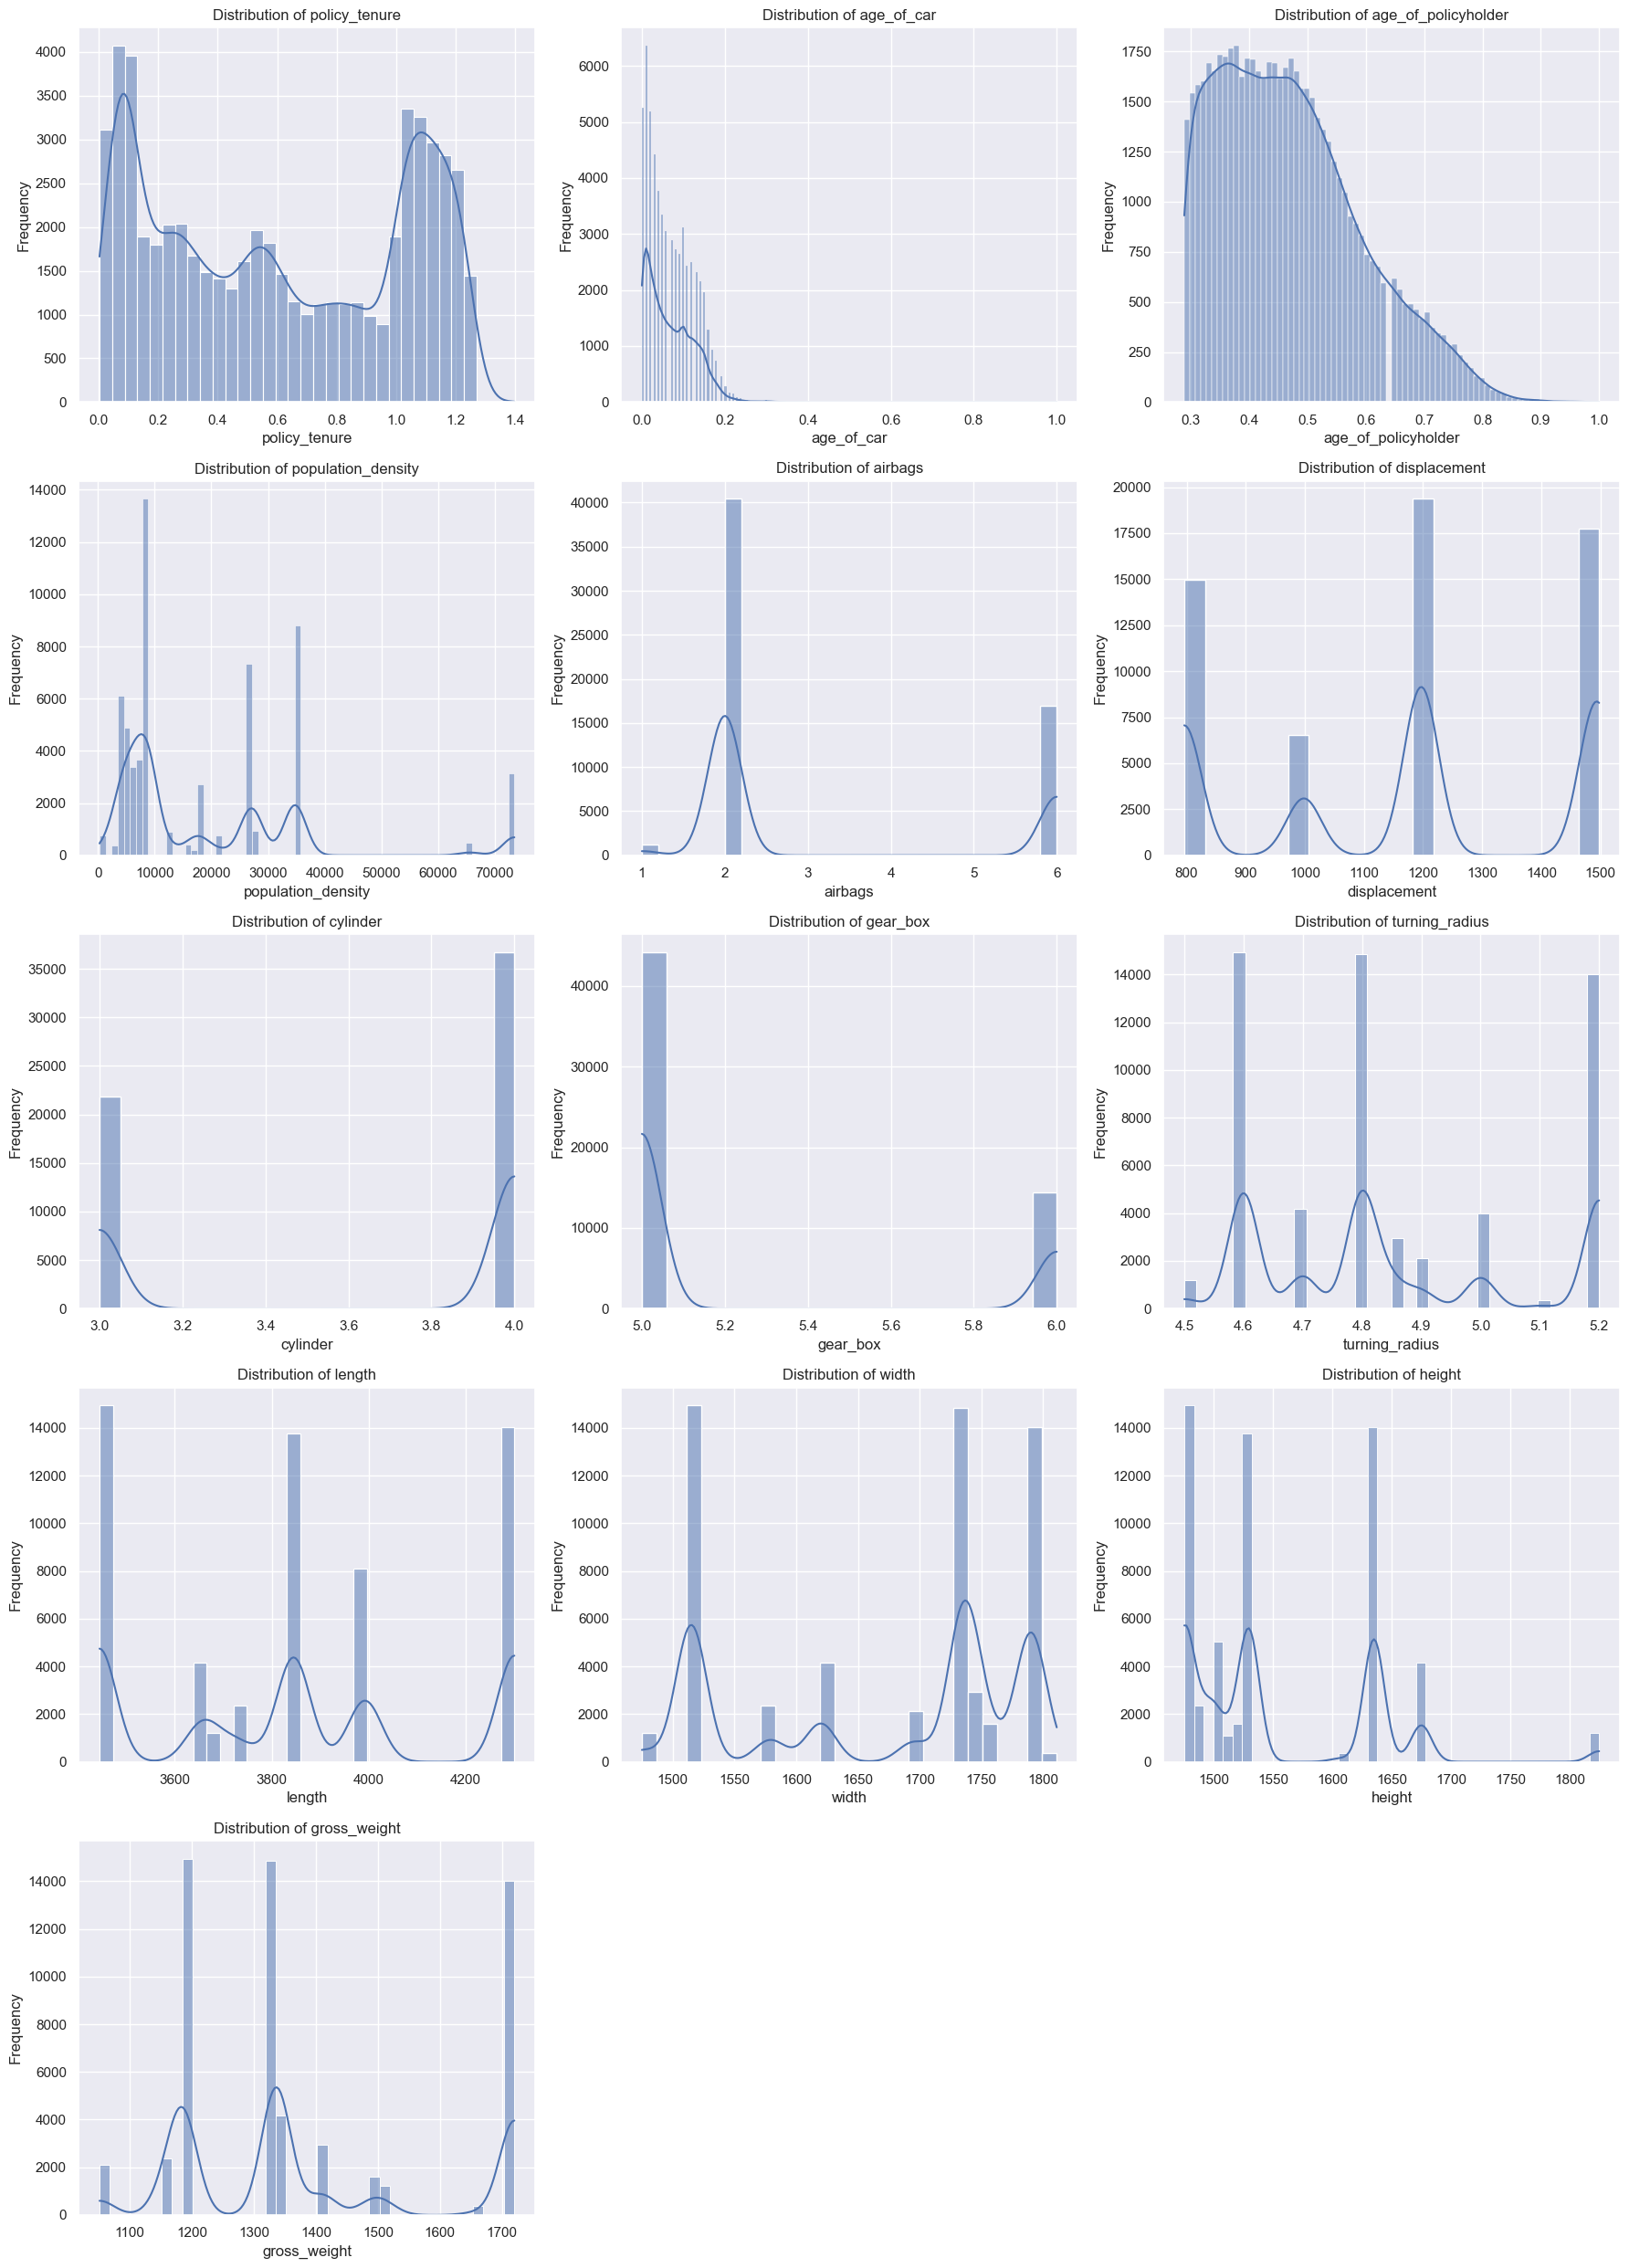

In [171]:
import math

def plot_numerical_distribution(merged_df, numerical_columns):
    """
    Plot distribution of numerical features in a DataFrame using a 3x3 grid of subplots.
    
    Parameters:
    merged_df (DataFrame): The input pandas DataFrame containing numerical columns.
    numerical_columns (list): List of numerical column names to plot.
    
    Returns:
    None (plots the distributions using matplotlib and seaborn)
    """
    # Calculate number of rows and columns for subplots
    num_cols = len(numerical_columns)
    num_rows = math.ceil(num_cols / 3)  # 3 columns per row
    
    # Create a figure and axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5*num_rows))
    
    # Flatten axes if there is only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Iterate over each numerical column and plot
    for i, col in enumerate(numerical_columns):
        row_idx = i // 3
        col_idx = i % 3
        
        # Create a histogram with KDE plot for the current column
        sns.histplot(data=merged_df, x=col, kde=True, ax=axes[row_idx, col_idx])
        
        # Set labels and title for the plot
        axes[row_idx, col_idx].set_xlabel(col)
        axes[row_idx, col_idx].set_ylabel('Frequency')
        axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    
    # Remove any unused subplots if num_cols is not a multiple of 3
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[j])
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


plot_numerical_distribution(data,numerical_columns)

In [172]:
data[numerical_columns].nunique()

policy_tenure          58592
age_of_car                49
age_of_policyholder       75
population_density        22
airbags                    3
displacement               9
cylinder                   2
gear_box                   2
turning_radius             9
length                     9
width                     10
height                    11
gross_weight              10
dtype: int64

In [173]:
# observation:
# Below features have numerical variance values rest are more like a category variable
# policy_tenure          58592
# age_of_car                49
# age_of_policyholder       75
# population_density        22
# turning_radius             9
# length                     9
# width                     10
# height                    11
# gross_weight              10
#Most features are right skewed distribution and multi modal distributions

In [174]:
# Basic steps to take for dataset preprocessing
# missing values check and imputation -- done No missing values
# duplicate check -- done No duplicates
# outliers treatment
# encoding for categorical columns
# scaling for higher values features after TTS only and tranform only on test data
# imbalance check on target variable and treatment

## Doing Bivariate visualisation with feature and target

In [175]:
data.groupby('make')['is_claim'].mean()

make
1    0.064392
2    0.053940
3    0.064275
4    0.066803
5    0.062914
Name: is_claim, dtype: float64

In [176]:
#this function can plot feature and its percntage of target bifurcation
def plotCategoryVersusTarget(columns,target):
    for col in columns:
        # Calculate percentages of claims for each car make
        percentage_claims = data.groupby(col)[target].mean() * 100

        plt.figure(figsize=(6, 3))
        ax = sns.countplot(x=col, data=data, hue=target, palette='Set1')

        # Add percentages on top of each bar
        total = len(data)  # Total number of data points
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height/total:.1%}', ha='center', fontsize=8)

        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'{col} vs {target}')
        plt.grid(True)
        plt.legend(title='Claim Status', loc='upper right', labels=['No Claim', 'Claim'])
        plt.xticks(rotation=45)
        plt.show()


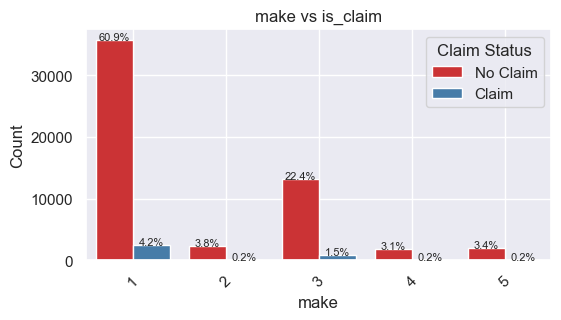

In [177]:
# for 'make'
plotCategoryVersusTarget(['make'],'is_claim')
# 2,4,5 make have less claims and most of the claims are for make 1 and 3 and overall there count is also more
#than other makes

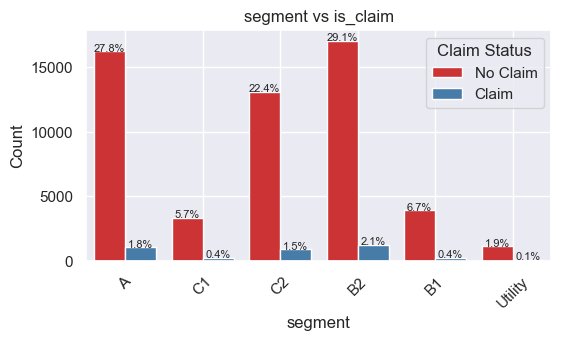

In [178]:

# for 'segment'

plotCategoryVersusTarget(['segment'],'is_claim')

#segment wise claims are more for A, C2 and B2


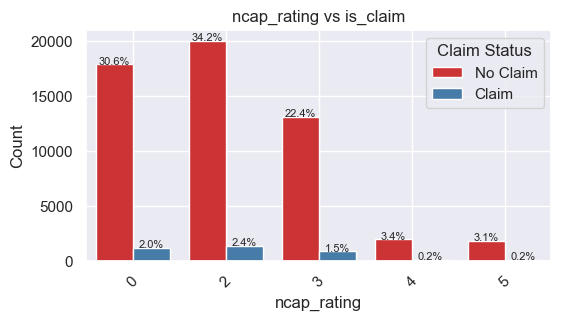

In [179]:
# for 'ncap_rating'
plotCategoryVersusTarget(['ncap_rating'],'is_claim')

#less ncap_rating more claims and people have less ncap_rating vechile's

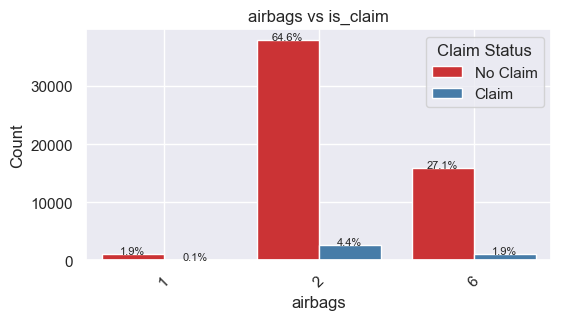

In [180]:
#airbags wise claims
plotCategoryVersusTarget(['airbags'],'is_claim')
# 2 airbags vehcile are more and so claim is also more but relatively if we see
# 27/1.9 is for 6 airbags more as compared to 64.6/4.4

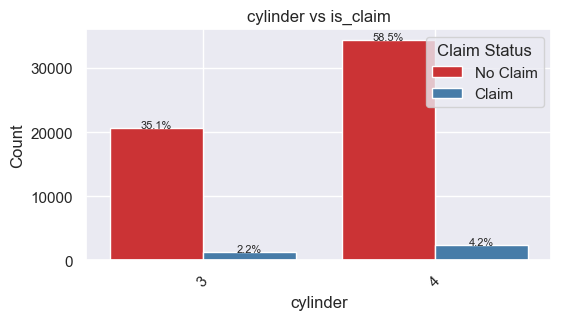

In [181]:
#cylinder 3 or 4 eninge wise claims
plotCategoryVersusTarget(['cylinder'],'is_claim')

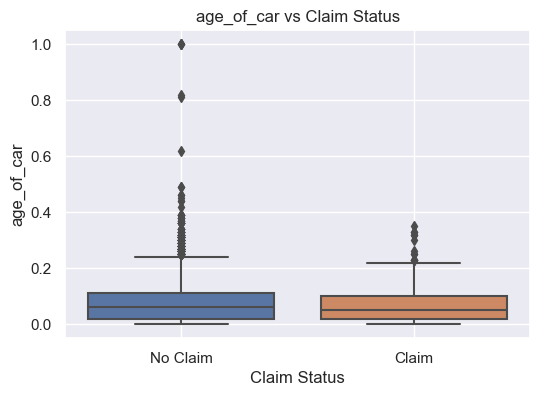

In [182]:
# Example: Baox plot for 'age_of_car'
# Plotting
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_claim', y='age_of_car', data=data)
plt.title('age_of_car vs Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('age_of_car')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.grid(True)
plt.show()


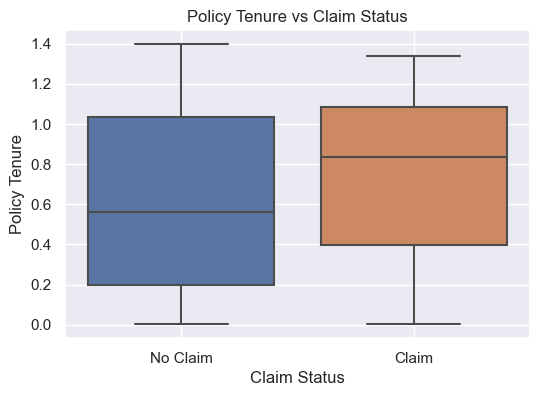

In [183]:
# Example: Bar plot for 'policy_tenure'
# Plotting
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_claim', y='policy_tenure', data=data)
plt.title('Policy Tenure vs Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Policy Tenure')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.grid(True)
plt.show()

#policy_tenure in range 0.4 to 1.1 have taken claims 

## Correlation Analysis for numerical features

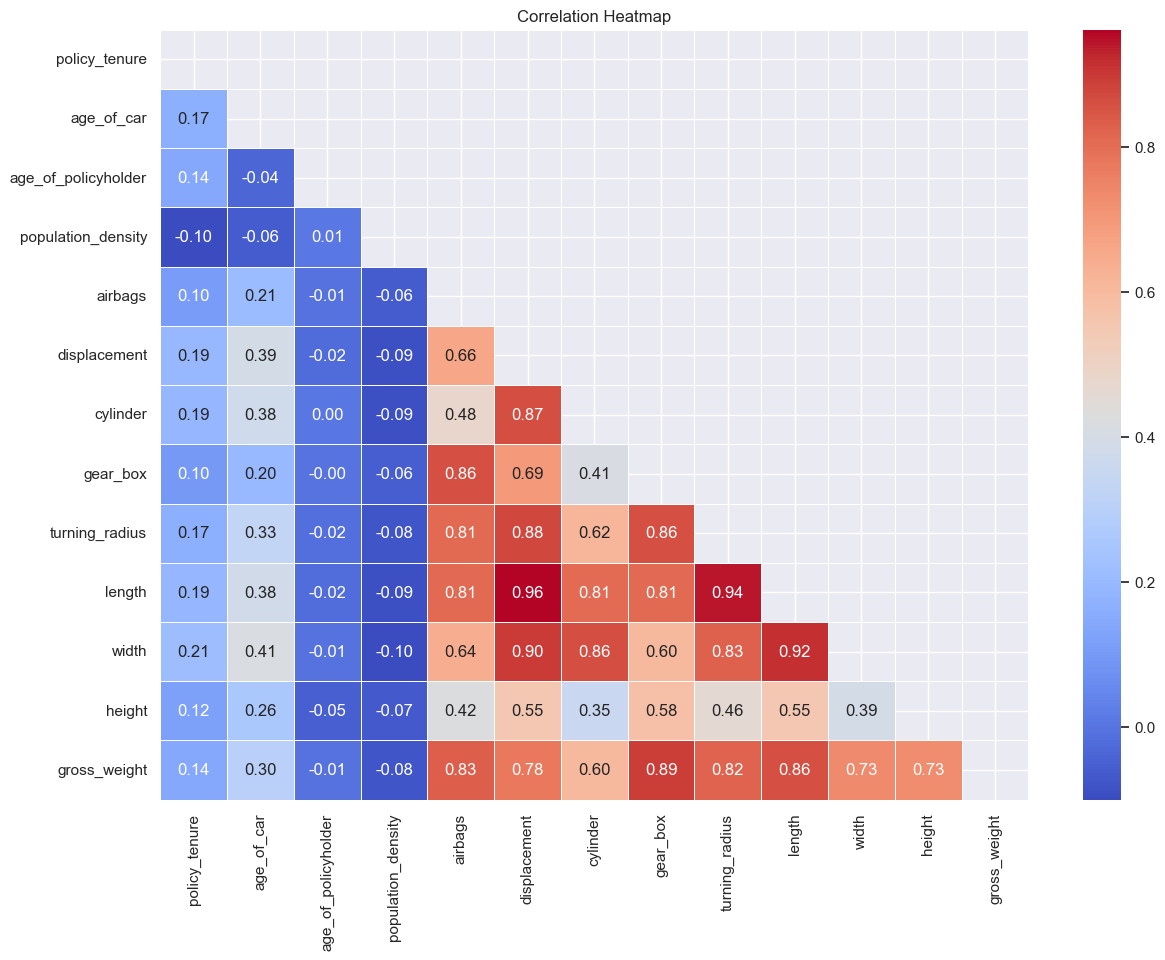

In [184]:
correlation_matrix = data.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [185]:
#Observations:
# >.6 correlated features:
#     (displacement,airbags) ,displacement,cylinder & gearbox,airbags & displacement,gearbox
#     majority of features are Lineraly correlated
# max torque are highly + correlated to displacement,gear box,turning radius,lenght and dimension of vechile


## Feautre creation :

In [186]:
# Define a function to extract torque and rpm
import re
def extract_torque_and_rpm(combined_string):
    # Regular expression to match torque (numbers followed by 'Nm')
    torque = re.search(r'([\d.]+)Nm', combined_string).group(1)
    # Regular expression to match rpm (numbers followed by 'rpm')
    rpm = re.search(r'(\d+)rpm', combined_string).group(1)
    
    return pd.Series({'max_torque_nm': float(torque), 'rpm_at_max_torque': int(rpm)})

# Apply the function to extract torque and rpm
data[['max_torque_nm', 'rpm_at_max_torque']] = data['max_torque'].apply(extract_torque_and_rpm)

# Display the updated DataFrame
data[['max_torque','max_torque_nm', 'rpm_at_max_torque']].head()

,max_torque,max_torque_nm,rpm_at_max_torque
0,60Nm@3500rpm,60.0,3500.0
1,60Nm@3500rpm,60.0,3500.0
2,60Nm@3500rpm,60.0,3500.0
3,113Nm@4400rpm,113.0,4400.0
4,91Nm@4250rpm,91.0,4250.0


In [187]:
#taking the same approach to split max power and rpm to 2 columns here
# Define a function to extract max power (bhp) and rpm
def extract_max_power_and_rpm(combined_string):
    # Regular expression to match max power (numbers or decimal numbers followed by 'bhp')
    max_power = re.search(r'([\d.]+)bhp', combined_string).group(1)
    
    # Regular expression to match rpm (numbers followed by 'rpm')
    rpm = re.search(r'(\d+)rpm', combined_string).group(1)
    
    return pd.Series({'max_power_bhp': float(max_power), 'rpm_at_max_power': int(rpm)})

# Apply the function to extract max power and rpm
data[['max_power_bhp', 'rpm_at_max_power']] = data['max_power'].apply(extract_max_power_and_rpm)


In [188]:
data[['max_power','max_power_bhp', 'rpm_at_max_power']].head()

,max_power,max_power_bhp,rpm_at_max_power
0,40.36bhp@6000rpm,40.36,6000.0
1,40.36bhp@6000rpm,40.36,6000.0
2,40.36bhp@6000rpm,40.36,6000.0
3,88.50bhp@6000rpm,88.50,6000.0
4,67.06bhp@5500rpm,67.06,5500.0


In [189]:
#dropping max_torque and max_power from encoded dataset
data.drop(columns=['max_torque','max_power'],inplace=True)

### Now we have done EDA we will proceed with data preprocessing part

## checking outliers and treatment

In [190]:
def visualize_boxplots(df, plot_size=(16, 20)):
    """
    Visualize box plots for all numeric columns in a DataFrame.
    """
    # Ensure seaborn is set up for nice-looking plots
    sns.set(style="whitegrid")

    # Select numeric columns
    numeric_cols = df.select_dtypes(include='number').columns

    # Calculate number of rows and columns for subplots
    num_plots = len(numeric_cols)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

    # Create subplots with adjusted plot_size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=plot_size)
    
    # Flatten axes if there's only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Iterate over each numeric column and plot in corresponding subplot
    for i, col in enumerate(numeric_cols):
        row = i // num_cols
        col_idx = i % num_cols
        sns.boxplot(x=df[col], ax=axes[row, col_idx], orient='v', width=0.3)
        axes[row, col_idx].set_title(f'Box Plot of {col}')
        axes[row, col_idx].set_ylabel(col)
    
    # Hide any extra subplots
    for i in range(num_plots, num_rows * num_cols):
        axes.flatten()[i].axis('off')

    plt.tight_layout()
    plt.show()


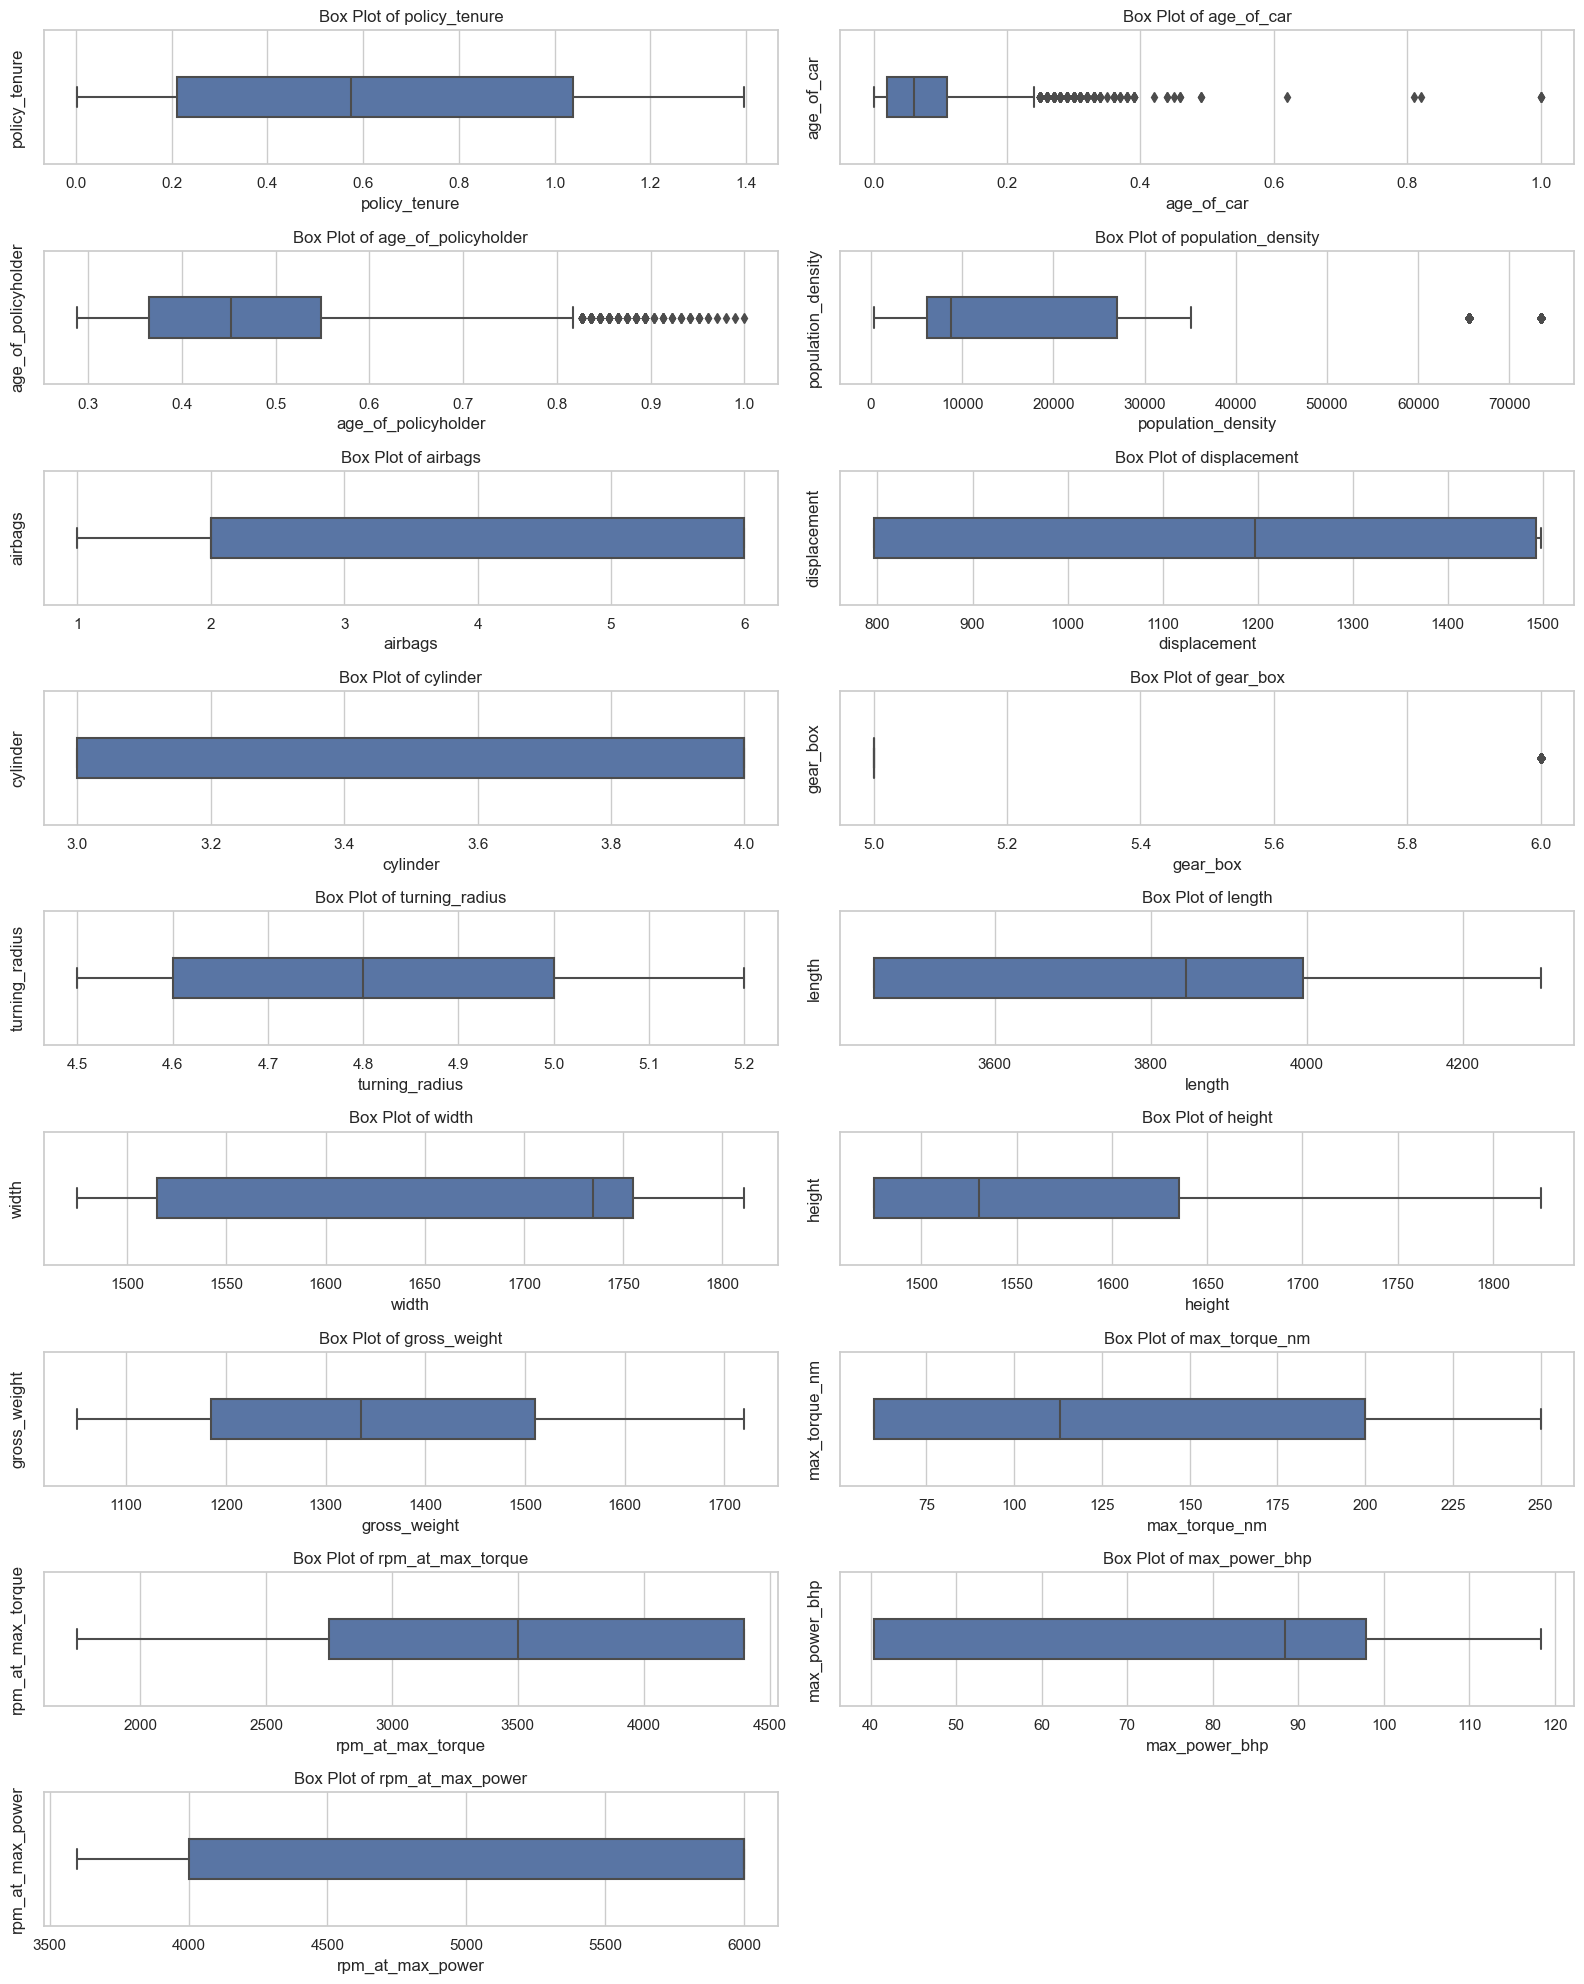

In [191]:
# Visualize box plots for numeric columns in `data`
visualize_boxplots(data)

In [192]:
#observation: by visualisation we can see that 'age_of_car', 'age_of_policyholder','population_density' features 
#having outliers so we have to treat them before proceeding further

oultiers_columns=['age_of_car', 'age_of_policyholder','population_density']
pre_outlier_df = data.copy()

## Treating outliers by capping LL and UL approach

In [193]:
# Function to cap outliers based on 1.5 IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Apply capping to each numerical column
for col in oultiers_columns:
    cleaned_df = cap_outliers(data, col)

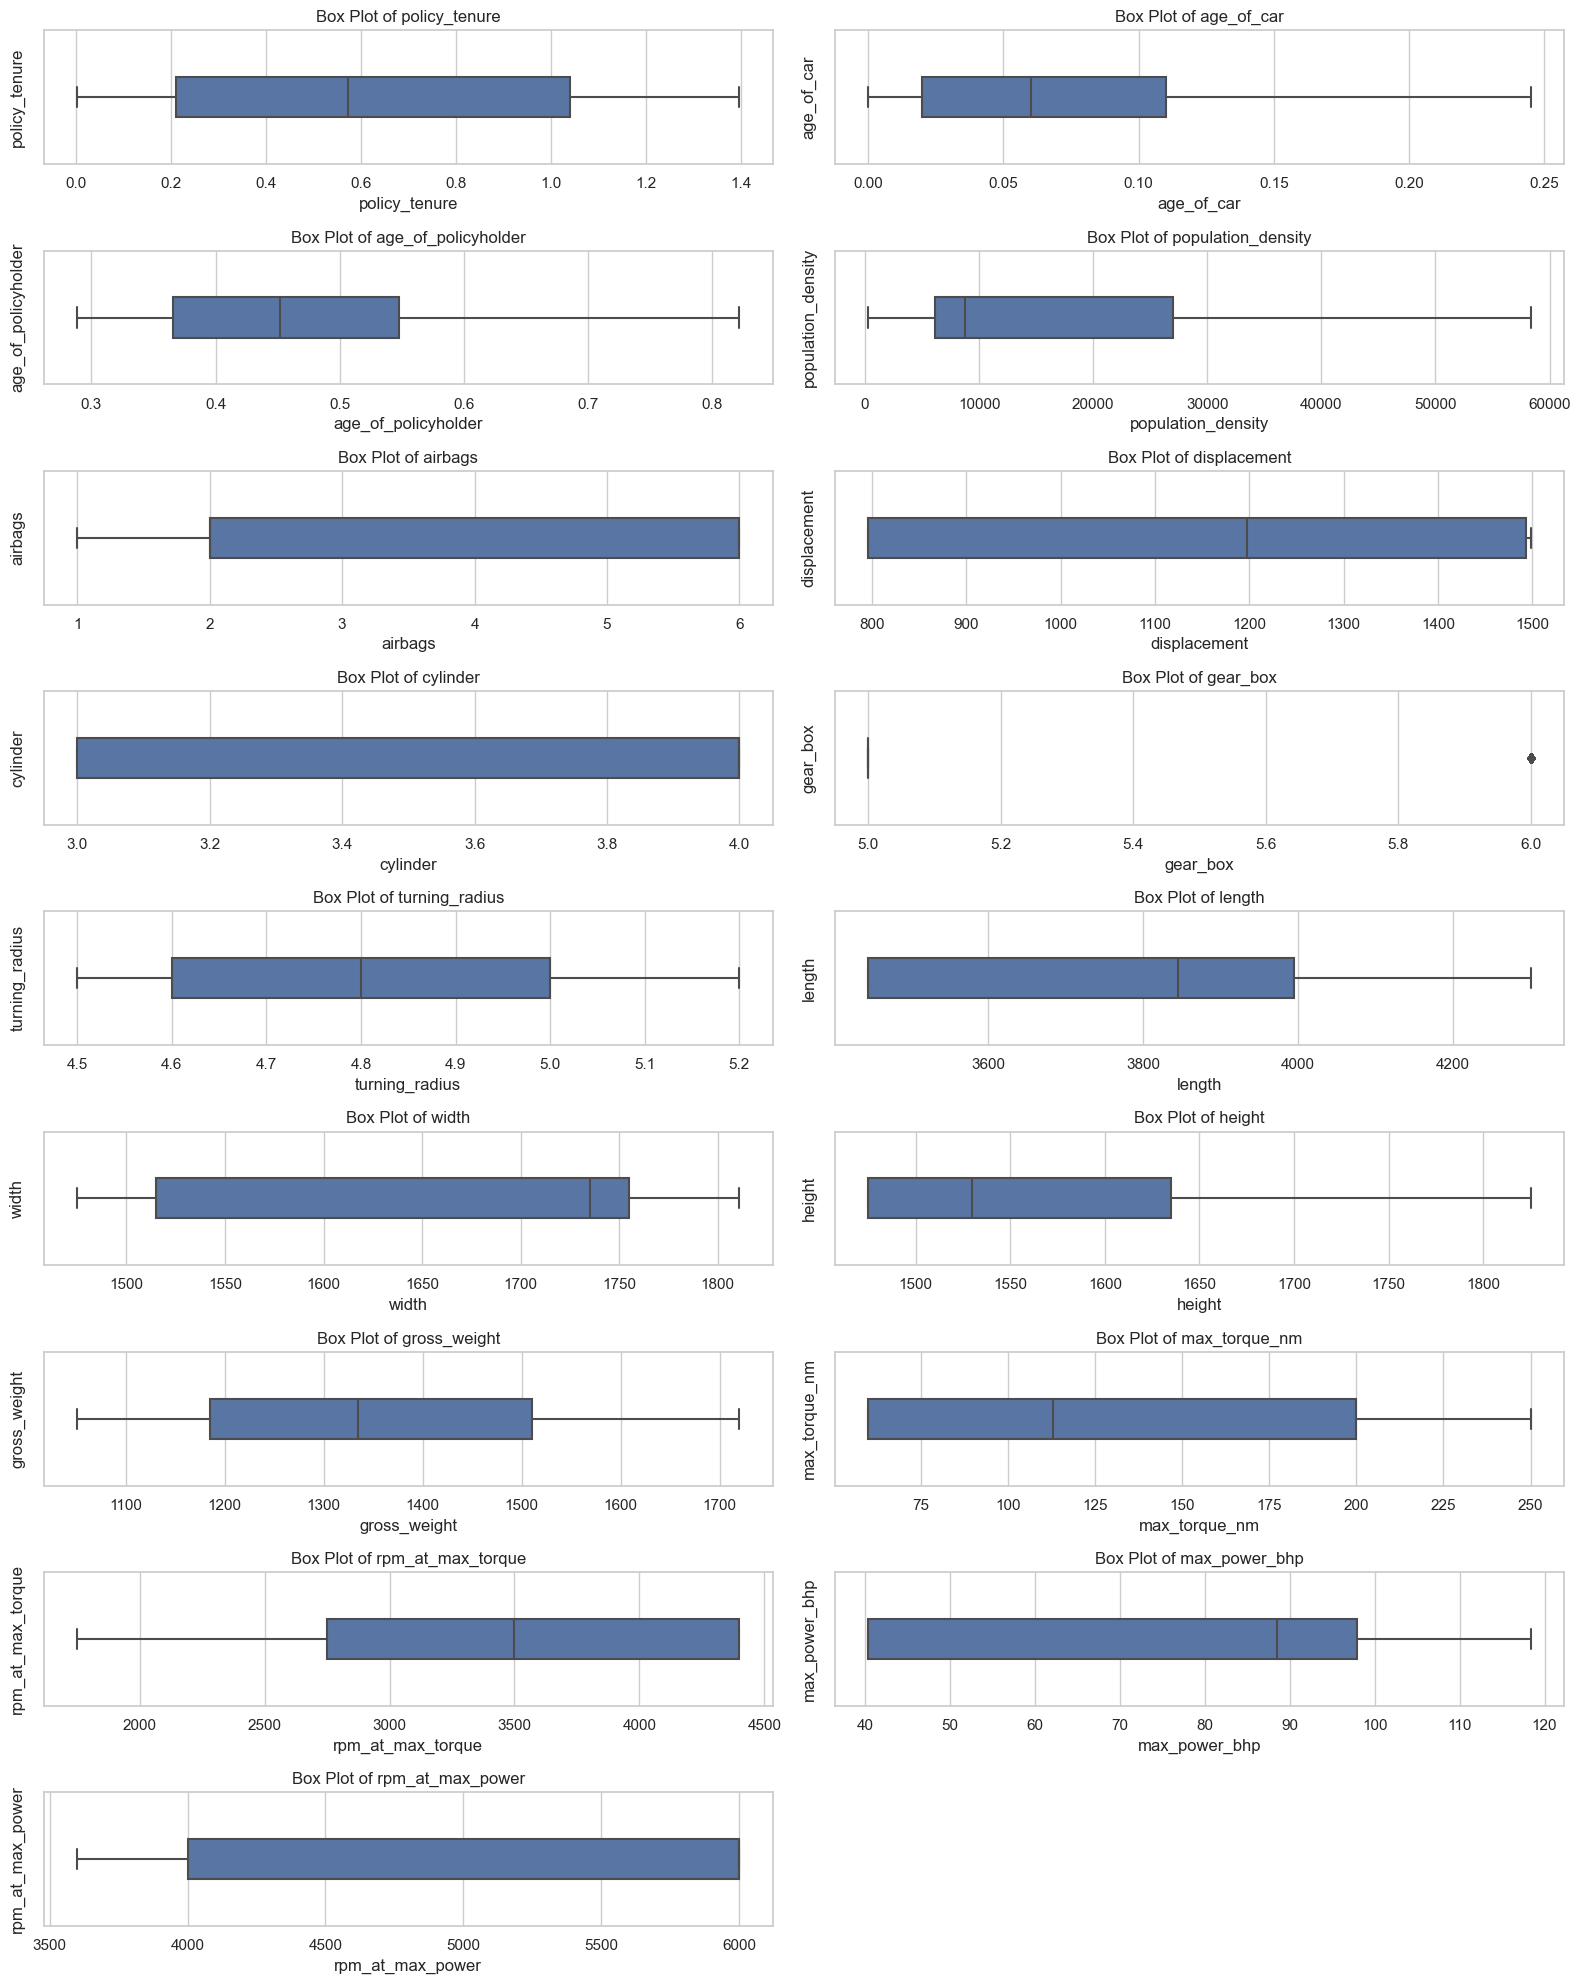

In [194]:
# Visualize box plots for with cleaned data now after outlier capping
visualize_boxplots(cleaned_df)

In [195]:
# # Define function to unscale using min-max scaling
# def unscale_min_max(scaled_values, min_orig, max_orig):
#     """
#     Unscale values from [0, 1.39] back to the original range [min_orig, max_orig].
    
#     Parameters:
#     scaled_values (pandas Series or numpy array): The scaled values to unscale.
#     min_orig (float): The original minimum value of the feature before scaling.
#     max_orig (float): The original maximum value of the feature before scaling.
    
#     Returns:
#     pandas Series: The unscaled original values.
#     """
#     return scaled_values * (max_orig - min_orig) + min_orig

# # Example original scaling parameters (replace with actual values)
# min_orig_policy_tenure = 0
# max_orig_policy_tenure = 10  # Example original maximum value before scaling for policy_tenure

# min_orig_age_of_car = 0
# max_orig_age_of_car = 20  # Example original maximum value before scaling for age_of_car

# min_orig_age_of_policyholder = 18
# max_orig_age_of_policyholder = 100  # Example original maximum value before scaling for age_of_policyholder

# # Unscaled values as new columns
# data['policy_tenure_orig'] = unscale_min_max(data['policy_tenure'], min_orig_policy_tenure, max_orig_policy_tenure)
# data['age_of_car_orig'] = unscale_min_max(data['age_of_car'], min_orig_age_of_car, max_orig_age_of_car)
# data['age_of_policyholder_orig'] = unscale_min_max(data['age_of_policyholder'], min_orig_age_of_policyholder, max_orig_age_of_policyholder)
# new_out=['policy_tenure_orig','age_of_car_orig','age_of_policyholder_orig']

### Now we have capped the outlier part so we need to encode the categorical features

## Encoding categorical features

In [196]:
#we will be using enseble and tree based models here so we will use label encoder for encoding

from sklearn.preprocessing import LabelEncoder
def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

for col in cleaned_df.select_dtypes('object').columns:
    cleaned_df[col] = label_encoder(cleaned_df[col])

area_cluster ['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
make [1 2 3 4 5]
segment ['A' 'B1' 'B2' 'C1' 'C2' 'Utility']
model ['M1' 'M10' 'M11' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9']
fuel_type ['CNG' 'Diesel' 'Petrol']
engine_type ['1.0 SCe' '1.2 L K Series Engine' '1.2 L K12N Dualjet' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' '1.5 Turbocharged Revotron'
 'F8D Petrol Engine' 'G12B' 'K Series Dual jet' 'K10C' 'i-DTEC']
is_esc ['No' 'Yes']
is_adjustable_steering ['No' 'Yes']
is_tpms ['No' 'Yes']
is_parking_sensors ['No' 'Yes']
is_parking_camera ['No' 'Yes']
rear_brakes_type ['Disc' 'Drum']
transmission_type ['Automatic' 'Manual']
steering_type ['Electric' 'Manual' 'Power']
is_front_fog_lights ['No' 'Yes']
is_rear_window_wiper ['No' 'Yes']
is_rear_window_washer ['No' 'Yes']
is_rear_window_defogger ['No' 'Yes']
is_brake_assist ['No' 'Yes']
is_power_door_locks ['No' 'Yes']
is_central_locking ['No' 'Yes']
is

In [197]:
cleaned_df.head(1).T
#encoding has been done on dataset

,0
policy_tenure,0.515874
age_of_car,0.050000
age_of_policyholder,0.644231
area_cluster,0.000000
population_density,4990.000000
make,0.000000
segment,0.000000
model,0.000000
fuel_type,0.000000
engine_type,6.000000


## Imabalance check for classification problems

In [212]:
cleaned_df['is_claim'].value_counts(normalize=True)*100
#its clearly an imbalance data as claim and no claim are 6.4% and 93.60% so we need to treat this imbalance also

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

### Now we are done with nan values check , outlier treatment , encdoing so we will split our data into X and y

### Splitting the data into independent variable and dependent variable

In [198]:
x = cleaned_df.drop(columns=['is_claim'], axis=1)
x.shape

(58592, 44)

In [199]:
y = cleaned_df['is_claim']
y.shape

(58592,)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,
                                                   stratify=y)

### Checking feature importance once by Random forest

In [200]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [201]:
f_df = pd.DataFrame({"feature":x_train.columns, 
                     'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance',
                                                                          ascending=False)

In [202]:
f_df[:5]#checking top 5 features here for there significance as per random forest

,feature,rf_importance
0,policy_tenure,0.475934
2,age_of_policyholder,0.263380
1,age_of_car,0.153861
4,population_density,0.050274
3,area_cluster,0.048483


In [203]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [204]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[43875     0]
 [    6  2992]]
*******************************
[[10909    60]
 [  749     1]]


In [205]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00      2998

    accuracy                           1.00     46873
   macro avg       1.00      1.00      1.00     46873
weighted avg       1.00      1.00      1.00     46873

*******************************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.02      0.00      0.00       750

    accuracy                           0.93     11719
   macro avg       0.48      0.50      0.48     11719
weighted avg       0.88      0.93      0.90     11719



In [206]:
print("***************accuracy_score for train dataset*********************")
print(accuracy_score(y_train, pred_train_rf))
print("***************accuracy_score for testing dataset****************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
0.9998719945384337
*******************************
0.9309668060414711


# RandomForest Classifier with feature selection part  - recursive feature technique

In [207]:
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=8, step=1 )
feature_1 = feature_1.fit(x_train, y_train)

In [208]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [209]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
0.9999359972692168
*******************************
0.9327587678129533


### XGB classifier fitting and prediction

In [213]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred_train_xgb = xgb.predict(x_train)
pred_test_xgb = xgb.predict(x_test)

print("***************classification_report*********************")
print(classification_report(y_train, pred_train_xgb))
print("*******************************")
print(classification_report(y_test, pred_test_xgb))

print("***************accuracy_score for train dataset*********************")
print(accuracy_score(y_train, pred_train_xgb))
print("***************accuracy_score for testing dataset****************")
print(accuracy_score(y_test, pred_test_xgb))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43875
           1       0.97      0.03      0.07      2998

    accuracy                           0.94     46873
   macro avg       0.95      0.52      0.52     46873
weighted avg       0.94      0.94      0.91     46873

*******************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719

***************accuracy_score for train dataset*********************
0.9381520278198536
***************accuracy_score for testing dataset****************
0.9355747077395682


In [214]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [218]:
xgb1 = XGBClassifier()
xgb1.fit(x_train_resampled, y_train_resampled)
pred_train_xgb1 = xgb1.predict(x_train_resampled)
pred_test_xgb1 = xgb1.predict(x_test)

print("***************classification_report*********************")
print(classification_report(y_train_resampled, pred_train_xgb1))
print("*******************************")
print(classification_report(y_test, pred_test_xgb1))

print("***************accuracy_score for train dataset*********************")
print(accuracy_score(y_train_resampled, pred_train_xgb1))
print("***************accuracy_score for testing dataset****************")
print(accuracy_score(y_test, pred_test_xgb1))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     43875
           1       0.99      0.89      0.94     43875

    accuracy                           0.94     87750
   macro avg       0.95      0.94      0.94     87750
weighted avg       0.95      0.94      0.94     87750

*******************************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.15      0.03      0.05       750

    accuracy                           0.93     11719
   macro avg       0.54      0.51      0.50     11719
weighted avg       0.89      0.93      0.90     11719

***************accuracy_score for train dataset*********************
0.9430997150997151
***************accuracy_score for testing dataset****************
0.9277242085502176


In [210]:
# cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.93259386 0.93323379 0.93280717 0.93407297 0.93215276 0.93023256
 0.93279283 0.92937913 0.93428632 0.93236612]

0.9323917509107684


In [141]:
def train_and_evaluate_models(X, y, test_size=0.2, random_state=42):
    """
    Function to train and evaluate multiple classification models on the given data.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'GradientBoosting': GradientBoostingClassifier(random_state=random_state,learning_rate=0.01,max_depth=4,n_estimators=500),
        'XGBoost': XGBClassifier(random_state=random_state)
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Print evaluation metrics
        print(f"\n***************{model_name}********************")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

        # Classification report
        print("\n*******************************")
        print(classification_report(y_test, y_pred))

In [142]:
train_and_evaluate_models(x, y)

Training Random Forest...

***************Random Forest********************
Accuracy: 0.9305
Precision: 0.8824
Recall: 0.9305
F1-Score: 0.9031

*******************************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10963
           1       0.11      0.01      0.02       756

    accuracy                           0.93     11719
   macro avg       0.52      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719

Training gb...

***************gb********************
Accuracy: 0.9355
Precision: 0.8751
Recall: 0.9355
F1-Score: 0.9043

*******************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



In [ ]:
#-------------------------------------------NOT IN USE ---------------------------------------------------------

In [ ]:
#Code to try unscaling the features age of car and age of policy holder and tennure of policy

In [102]:
# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on your data (assuming 'data' contains the scaled features)
# scaler.fit(data[['policy_tenure', 'age_of_car', 'age_of_policyholder']])

# # Inverse transform the scaled features
# unscaled_data = scaler.inverse_transform(data[['policy_tenure', 'age_of_car', 'age_of_policyholder']])

# # Create a DataFrame of unscaled data for clarity
# unscaled_df = pd.DataFrame(unscaled_data, columns=['policy_tenure', 'age_of_car', 'age_of_policyholder'])


# unscaled_df.describe()


In [ ]:
#further improvement to be done

# 1.Pipline implementation for encoding and model building
